In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/edwardamoah/Documents/GitHub/osmiaBeePop/research/data/Centrella_et_al_Data.csv")
forage = pd.read_csv("/Users/edwardamoah/Documents/GitHub/osmiaBeePop/research/data/Centrella_Spring_Forage_2015.csv")
tmean = pd.read_csv("/Users/edwardamoah/Documents/GitHub/osmiaBeePop/research/data/tmean_data.csv")
ppt = pd.read_csv("/Users/edwardamoah/Documents/GitHub/osmiaBeePop/research/data/ppt_data.csv")

In [3]:
data.columns.tolist()

['Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Site_Letters_in_Supplement',
 'Ag_250m',
 'Forest_250m',
 'Open_250m',
 'Other_250m',
 'WetShrub_250m',
 'Urban_250m',
 'Apples_250m',
 'Ag_500m',
 'Forest_500m',
 'Open_500m',
 'Other_500m',
 'WetShrub_500m',
 'Urban_500m',
 'Apples_500m',
 'Ag_750m',
 'Forest_750m',
 'Open750m',
 'Other_750m',
 'ShrubWet_750m',
 'Urban_750m',
 'Apples_750m',
 'Ag_1000m',
 'Forest_1000m',
 'Open_1000m',
 'Other_1000m',
 'ShrubWet_1000m',
 'Urban_1000m',
 'Apples_1000m',
 'Ag_1250m',
 'Forest_1250m',
 'Open_1250m',
 'Other_1250m',
 'ShrubWet_1250m',
 'Urban_1250m',
 'Apples_1250m',
 'Ag_1500m',
 'Forest_1500m',
 'Open_1500m',
 'Other_1500m',
 'ShrubWet_1500m',
 'Urban_1500m',
 'Apples_1500m',
 'Ag_1750',
 'Forest_1750m',
 'Open_1750m',
 'Other_1750m',
 'ShrubWet_1750m',
 'Urban_1750m',
 'Apples_1750m',
 'Ag_2000m',
 'Forest_2000m',
 'Open_2000m',
 'Other_2000m',
 'ShrubWet_2000m',
 'Urban_2000m',
 'Apples_2000m',
 'Total_Emerged_Males

In [4]:
new_cols = ['Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date', 
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
  'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
  'Ag_250m',
  'Ag_500m',
  'Ag_1000m',
  'Ag_2000m',
   'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness']

In [5]:
# filter some of the columns
data = data[new_cols]

In [6]:
data['Total_Emerged_Adults'] = data['Total_Emerged_Females'] + data['Total_Emerged_Males']

In [7]:
dt = data.groupby(['Site_Code',"Temp_C"], as_index=False).sum()[[ 'Site_Code',"Temp_C", "Total_Emerged_Adults"]]

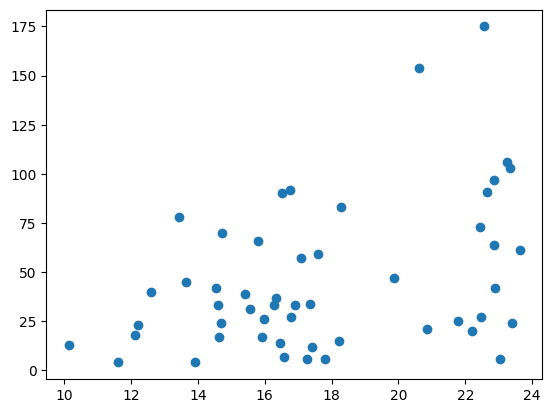

In [8]:
plt.scatter(dt['Temp_C'], dt['Total_Emerged_Adults'])

In [9]:
correlation = dt['Temp_C'].corr(dt['Total_Emerged_Adults'])
print(correlation)


0.3995882178927488


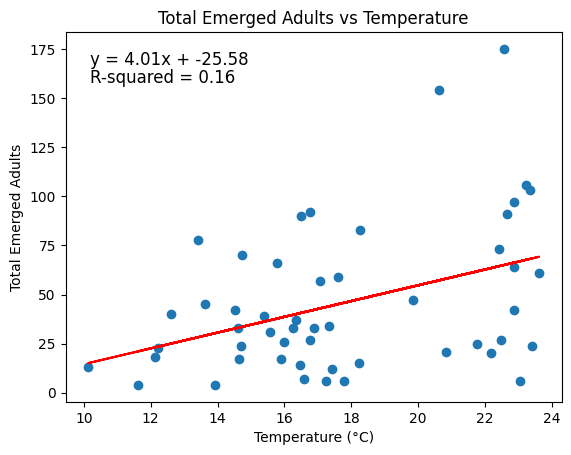

In [10]:
from scipy import stats
# Fit a linear regression line
coefficients = np.polyfit(dt['Temp_C'], dt['Total_Emerged_Adults'], 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(dt['Temp_C'], dt['Total_Emerged_Adults'])

# Plot the regression line
plt.plot(dt['Temp_C'], regression_line(dt['Temp_C']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt['Temp_C'], dt['Total_Emerged_Adults']).rvalue ** 2
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.9, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Temperature')
# Display the plot
plt.show()


In [11]:
dt = data.groupby(['Site_Code',"Temp_C"], as_index=False).sum()[[ 'Site_Code',"Temp_C", "Total_Emerged_Females"]]

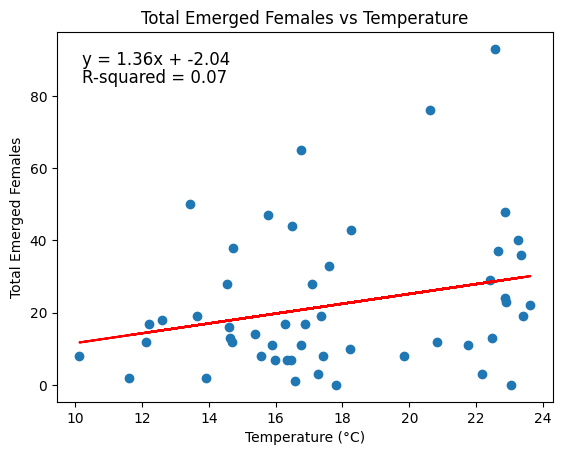

In [12]:
# Fit a linear regression line
coefficients = np.polyfit(dt['Temp_C'], dt['Total_Emerged_Females'], 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(dt['Temp_C'], dt['Total_Emerged_Females'])

# Plot the regression line
plt.plot(dt['Temp_C'], regression_line(dt['Temp_C']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt['Temp_C'], dt['Total_Emerged_Females']).rvalue ** 2
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.9, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Emerged Females')
plt.title('Total Emerged Females vs Temperature')
# Display the plot
plt.show()


In [13]:
dt['Temp_C'].corr(dt['Total_Emerged_Females'])

0.25726140759295985

In [14]:
data["Total_Nest_Tubes"] = data['Nest_Tubes for_Offspring_Analysis'] + data['Nest_Tubes_for_Pollen_Analysis']

In [15]:
dt = data.groupby(['Site_Code',"Temp_C"], as_index=False).sum()[[ 'Site_Code',"Temp_C", "Total_Nest_Tubes"]]

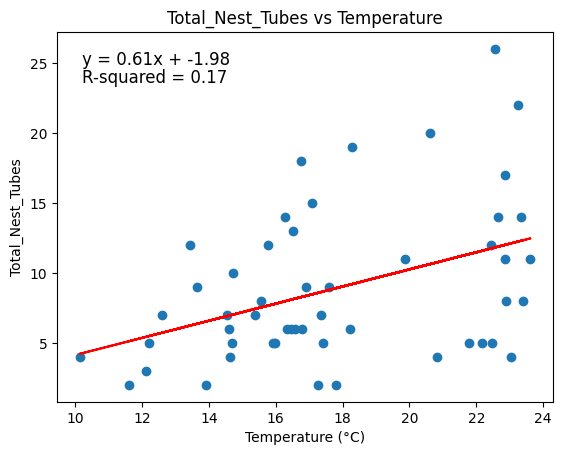

In [16]:
from scipy import stats
# Fit a linear regression line
coefficients = np.polyfit(dt['Temp_C'], dt['Total_Nest_Tubes'], 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(dt['Temp_C'], dt['Total_Nest_Tubes'])

# Plot the regression line
plt.plot(dt['Temp_C'], regression_line(dt['Temp_C']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt['Temp_C'], dt['Total_Nest_Tubes']).rvalue ** 2
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.9, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total_Nest_Tubes')
plt.title('Total_Nest_Tubes vs Temperature')
# Display the plot
plt.show()


In [17]:
dt['Temp_C'].corr(dt['Total_Nest_Tubes'])

0.4148934631258134

In [18]:
########### spring foraging map #########

In [19]:
data

,Site_Code,Orchard_Area_m2,Time_Point,Calendar_Date,Total_Emerged_Males,Total_Emerged_Females,Proportion_Female_Offspring,Ave_F_Weight_g,Ave_M_Weight_g,Proportion_Larval_Mortality,...,Ag_1000m,Ag_2000m,Fungicide_Risk_Ave%HQ,Insecticide_Risk_Ave%HQ,Herb_Risk_Ave%HQ,Floral_Fam_Richness,Floral_Shannon_Diversity,Floral_Evenness,Total_Emerged_Adults,Total_Nest_Tubes
0,AB,8108.310,1,5/20/15,5,10,0.666667,0.057284,0.029930,0.105263,...,0.066514,0.205731,0.000095,0.042831,0.000000,4,0.888046,0.640590,15,6
1,AB,8108.310,2,5/28/15,67,36,0.349515,0.058829,0.031763,0.065421,...,0.066514,0.205731,0.000270,3.322949,0.000000,5,1.074803,0.667812,103,14
2,AB,8108.310,3,6/3/15,19,7,0.269231,0.053402,0.037182,0.000000,...,0.066514,0.205731,0.000240,12.830494,0.006182,5,0.934787,0.580816,26,5
3,BA,14269.631,1,5/25/15,26,19,0.422222,0.054908,0.035723,0.238095,...,0.489971,0.554394,0.001898,12.092724,0.014064,2,0.597358,0.861806,45,9
4,BA,14269.631,2,5/29/15,66,40,0.377358,0.065413,0.037101,0.193333,...,0.489971,0.554394,0.004497,23.096308,0.026891,3,0.799700,0.727919,106,22
5,BA,14269.631,3,6/4/15,16,17,0.515152,0.053668,0.031057,0.183673,...,0.489971,0.554394,0.001509,7.742866,0.008964,3,0.725580,0.660452,33,9
6,BD,26093.088,1,5/23/15,28,50,0.641026,0.055874,0.034236,0.066667,...,0.497709,0.341119,0.031538,29.040619,0.000000,2,0.663214,0.956816,78,12
7,BD,26093.088,2,5/30/15,14,11,0.440000,0.059838,0.030801,0.000000,...,0.497709,0.341119,0.037462,46.698101,0.047136,3,0.340787,0.310198,25,5
8,BD,26093.088,3,6/5/15,17,16,0.484848,0.056671,0.032054,0.030303,...,0.497709,0.341119,0.036455,20.642495,0.021636,3,0.525767,0.478574,33,6
9,EV,68772.525,1,5/27/15,78,76,0.493506,0.059644,0.039155,0.079268,...,0.136755,0.089763,0.000073,0.057108,0.000000,3,0.951069,0.865701,154,20


In [20]:
forage['Site_Code'] = forage['Site'].str.replace(' ', '')
#data1 = forage.merge(data, on='Site_Code')
forage1 = forage.query('radius == "1km"')
data1 = forage1.merge(data, on='Site_Code')


In [21]:
data1

,Site,Long,Lat,class,radius,season,year,value,Site_Code,Orchard_Area_m2,...,Ag_1000m,Ag_2000m,Fungicide_Risk_Ave%HQ,Insecticide_Risk_Ave%HQ,Herb_Risk_Ave%HQ,Floral_Fam_Richness,Floral_Shannon_Diversity,Floral_Evenness,Total_Emerged_Adults,Total_Nest_Tubes
0,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.066514,0.205731,0.000095,0.042831,0.000000,4,0.888046,0.640590,15,6
1,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.066514,0.205731,0.000270,3.322949,0.000000,5,1.074803,0.667812,103,14
2,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.066514,0.205731,0.000240,12.830494,0.006182,5,0.934787,0.580816,26,5
3,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.489971,0.554394,0.001898,12.092724,0.014064,2,0.597358,0.861806,45,9
4,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.489971,0.554394,0.004497,23.096308,0.026891,3,0.799700,0.727919,106,22
5,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.489971,0.554394,0.001509,7.742866,0.008964,3,0.725580,0.660452,33,9
6,BD,-76.65786,42.55345,Forage,1km,spring,2015,0.378125,BD,26093.088,...,0.497709,0.341119,0.031538,29.040619,0.000000,2,0.663214,0.956816,78,12
7,BD,-76.65786,42.55345,Forage,1km,spring,2015,0.378125,BD,26093.088,...,0.497709,0.341119,0.037462,46.698101,0.047136,3,0.340787,0.310198,25,5
8,BD,-76.65786,42.55345,Forage,1km,spring,2015,0.378125,BD,26093.088,...,0.497709,0.341119,0.036455,20.642495,0.021636,3,0.525767,0.478574,33,6
9,EV,-76.56695,42.19008,Forage,1km,spring,2015,0.587500,EV,68772.525,...,0.136755,0.089763,0.000073,0.057108,0.000000,3,0.951069,0.865701,154,20


In [22]:
data2 = data1#.query(" radius == '1km' ")

In [23]:
data1.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes']

In [24]:
dt2 = data2[["Site_Code", "Temp_C","value","Total_Emerged_Adults", "Nest_Tubes for_Offspring_Analysis", 'Proportion_Larval_Mortality', "Ag_250m", "Ag_500m", "Ag_1000m", "Ag_2000m"]].groupby(['Site_Code'], as_index=False).mean()

In [25]:
dt2 = data2[["Site_Code", "Temp_C","value","Total_Emerged_Adults", "Nest_Tubes for_Offspring_Analysis", 'Proportion_Larval_Mortality', "Ag_250m", "Ag_500m", "Ag_1000m", "Ag_2000m"]].groupby(['Site_Code'], as_index=False).mean()

# generic value
dt2["egg_per_day"]=(dt2["Total_Emerged_Adults"]/dt2["Nest_Tubes for_Offspring_Analysis"])/6

In [26]:
dt2['value'].corr(dt2['egg_per_day'])

0.31487290402891593

In [27]:
dt2

,Site_Code,Temp_C,value,Total_Emerged_Adults,Nest_Tubes for_Offspring_Analysis,Proportion_Larval_Mortality,Ag_250m,Ag_500m,Ag_1000m,Ag_2000m,egg_per_day
0,AB,19.180961,0.465625,48.000000,6.333333,0.056895,0.063348,0.071918,0.066514,0.205731,1.263158
1,BA,17.923662,0.343750,61.333333,11.000000,0.205034,0.598174,0.572248,0.489971,0.554394,0.929293
2,BD,16.598320,0.378125,45.333333,5.666667,0.032323,0.470320,0.515535,0.497709,0.341119,1.333333
3,EV,17.869944,0.587500,76.000000,11.000000,0.100560,0.027149,0.065367,0.136755,0.089763,1.151515
4,GR,17.613889,0.390625,15.000000,2.333333,0.163158,0.543379,0.545040,0.415856,0.509642,1.071429
5,HG,14.064100,0.565625,44.666667,6.000000,0.095793,0.203620,0.107798,0.148498,0.167013,1.240741
6,HS,17.706927,0.396875,33.666667,5.000000,0.166311,0.172727,0.180571,0.309367,0.399413,1.122222
7,IC,17.356604,0.443750,61.666667,7.333333,0.055485,0.312217,0.309989,0.227090,0.228565,1.401515
8,IT,18.329505,0.443750,66.666667,9.333333,0.137844,0.142202,0.113402,0.155256,0.107783,1.190476
9,KI,18.859304,0.400000,36.333333,5.333333,0.129935,0.240741,0.391504,0.422515,0.297592,1.135417


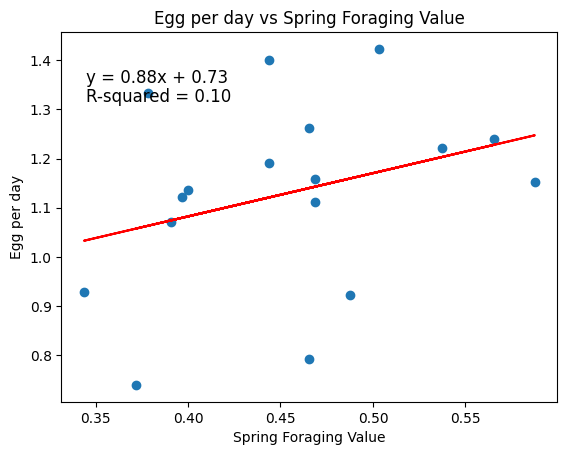

In [28]:
from scipy import stats
# Fit a linear regression line
coefficients = np.polyfit(dt2['value'], dt2['egg_per_day'], 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(dt2['value'], dt2['egg_per_day'])

# Plot the regression line
plt.plot(dt2['value'], regression_line(dt2['value']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt2['value'], dt2['egg_per_day']).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Spring Foraging Value')
plt.ylabel('Egg per day')
plt.title('Egg per day vs Spring Foraging Value')
# Display the plot
plt.show()


In [29]:
dt2[['egg_per_day']].describe()

,egg_per_day
count,17.000000
mean,1.129937
std,0.193374
min,0.739583
25%,1.071429
50%,1.151515
75%,1.240741
max,1.423077


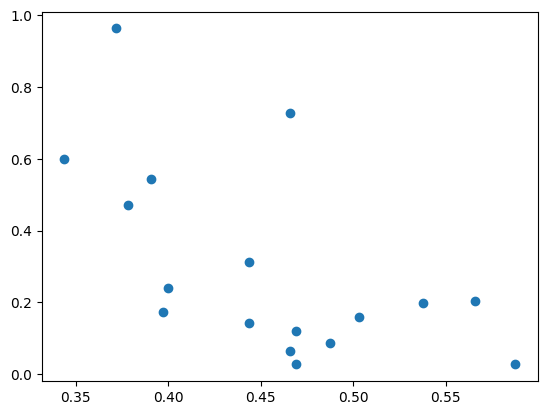

In [30]:
plt.scatter(dt2['value'], dt2['Ag_250m'])

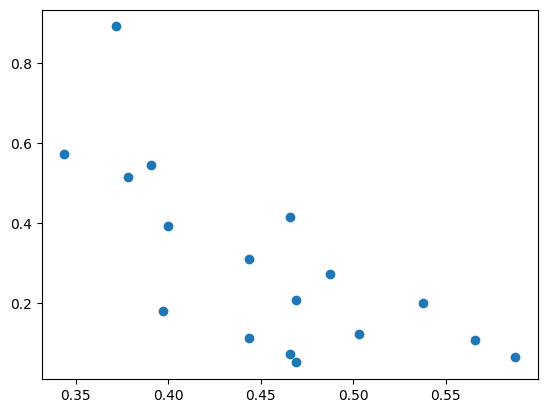

In [31]:
plt.scatter(dt2['value'], dt2['Ag_500m'])

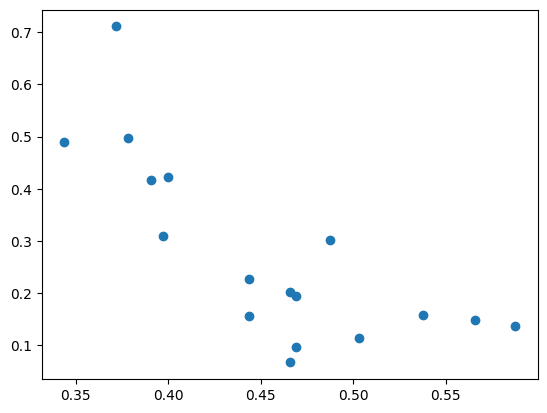

In [32]:
plt.scatter(dt2['value'], dt2['Ag_1000m'])

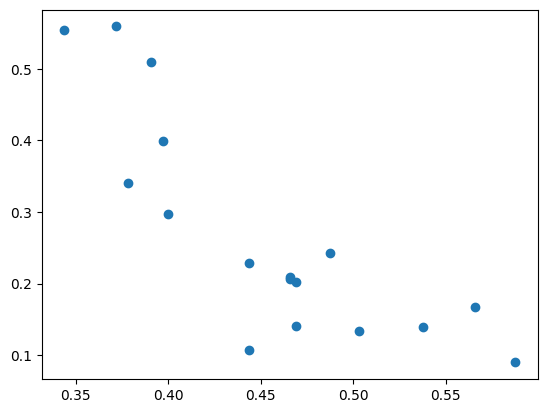

In [33]:
plt.scatter(dt2['value'], dt2['Ag_2000m'])

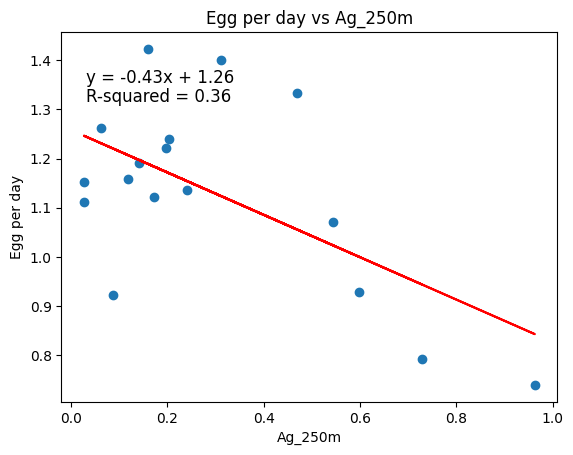

In [34]:
from scipy import stats
# Fit a linear regression line
coefficients = np.polyfit(dt2['Ag_250m'], dt2['egg_per_day'], 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(dt2['Ag_250m'], dt2['egg_per_day'])

# Plot the regression line
plt.plot(dt2['Ag_250m'], regression_line(dt2['Ag_250m']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt2['Ag_250m'], dt2['egg_per_day']).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Ag_250m')
plt.ylabel('Egg per day')
plt.title('Egg per day vs Ag_250m')
# Display the plot
plt.show()


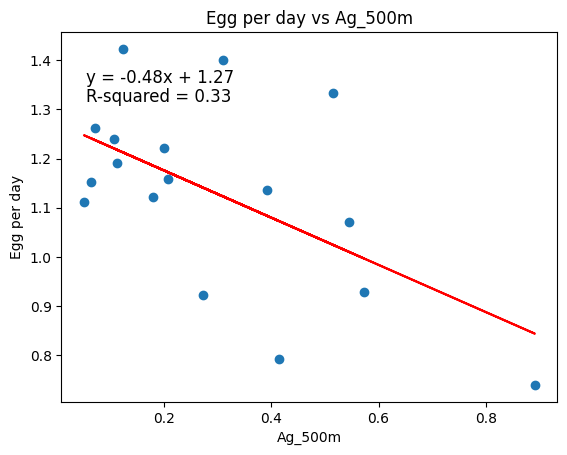

In [35]:
from scipy import stats
# Fit a linear regression line
coefficients = np.polyfit(dt2['Ag_500m'], dt2['egg_per_day'], 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(dt2['Ag_500m'], dt2['egg_per_day'])

# Plot the regression line
plt.plot(dt2['Ag_500m'], regression_line(dt2['Ag_500m']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt2['Ag_500m'], dt2['egg_per_day']).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Ag_500m')
plt.ylabel('Egg per day')
plt.title('Egg per day vs Ag_500m')
# Display the plot
plt.show()

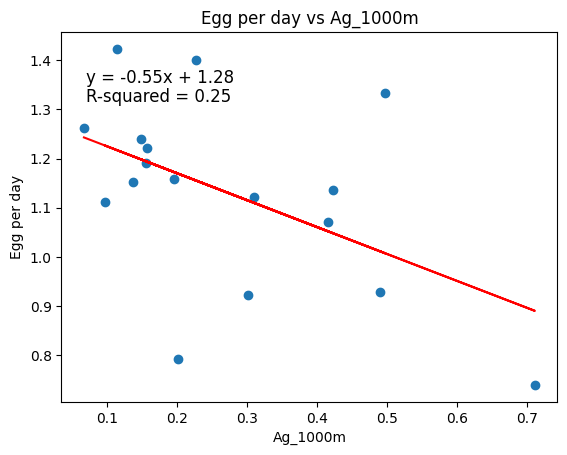

In [36]:
from scipy import stats
# Fit a linear regression line
coefficients = np.polyfit(dt2['Ag_1000m'], dt2['egg_per_day'], 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(dt2['Ag_1000m'], dt2['egg_per_day'])

# Plot the regression line
plt.plot(dt2['Ag_1000m'], regression_line(dt2['Ag_1000m']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt2['Ag_1000m'], dt2['egg_per_day']).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Ag_1000m')
plt.ylabel('Egg per day')
plt.title('Egg per day vs Ag_1000m')
# Display the plot
plt.show()

In [37]:
############ create a glm model ##########

In [38]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes']

In [39]:
dt3 = data2[["Site_Code", 'Calendar_Date',"Temp_C","value","Total_Emerged_Adults", "Nest_Tubes for_Offspring_Analysis", 'Proportion_Larval_Mortality', "Ag_250m", "Ag_500m", "Ag_1000m", "Ag_2000m"]].groupby(['Site_Code', 'Calendar_Date']).mean()
# generic value
dt3["egg_per_day"]=(dt3["Total_Emerged_Adults"]/dt3["Nest_Tubes for_Offspring_Analysis"])/6
dt3

Temp_C     value  Total_Emerged_Adults  \
Site_Code Calendar_Date                                              
AB        5/20/15        18.225694  0.465625                  15.0   
          5/28/15        23.341837  0.465625                 103.0   
          6/3/15         15.975352  0.465625                  26.0   
BA        5/25/15        13.638298  0.343750                  45.0   
          5/29/15        23.239583  0.343750                 106.0   
          6/4/15         16.893103  0.343750                  33.0   
BD        5/23/15        13.424370  0.378125                  78.0   
          5/30/15        21.771277  0.378125                  25.0   
          6/5/15         14.599315  0.378125                  33.0   
EV        5/27/15        20.625000  0.587500                 154.0   
          6/2/15         17.080986  0.587500                  57.0   
          6/6/15         15.903846  0.587500                  17.0   
GR        5/25/15        13.910526  0.390625                   4.0   
          5/29/15        22.469072  0.390625                  27.0   
          6/4/15         16.462069  0.390625                  14.0   
HG        5/23/15        10.131068  0.565625                  13.0   
          6/2/15         16.503759  0.565625                  90.0   
          6/6/15         15.557471  0.565625                  31.0   
HS        5/20/15        17.597403  0.396875                  59.0   
          5/24/15        12.116162  0.396875                  18.0   
          5/28/15        23.407216  0.396875                  24.0   
IC        5/24/15        14.720395  0.443750                  70.0   
          5/30/15        22.650943  0.443750                  91.0   
          6/5/15         14.698473  0.443750                  24.0   
IT        5/21/15        15.782051  0.443750                  66.0   
          5/29/15        22.860825  0.443750                  97.0   
          6/4/15         16.345638  0.443750                  37.0   
KI        5/23/15        14.538136  0.400000                  42.0   
          5/26/15        19.854430  0.400000                  47.0   
          5/30/15        22.185345  0.400000                  20.0   
LA        5/21/15        17.415789  0.468750                  12.0   
          5/29/15        23.622449  0.468750                  61.0   
          6/4/15         16.774306  0.468750                  27.0   
LF        5/20/15        18.267123  0.465625                  83.0   
          5/28/15        23.042553  0.465625                   6.0   
          6/3/15         17.253731  0.465625                   6.0   
LT        5/23/15        12.600000  0.537500                  40.0   
          5/27/15        22.868932  0.537500                  64.0   
          6/6/15         17.798851  0.537500                   6.0   
OK        5/21/15        16.765957  0.468750                  92.0   
          5/29/15        22.568182  0.468750                 175.0   
          6/4/15         15.393939  0.468750                  39.0   
RE        5/24/15        12.219388  0.487500                  23.0   
          5/28/15        22.879121  0.487500                  42.0   
          6/3/15         16.577206  0.487500                   7.0   
RF        5/20/15        17.344156  0.371875                  34.0   
          5/24/15        11.610465  0.371875                   4.0   
          6/3/15         16.272152  0.371875                  33.0   
WH        5/23/15        14.629771  0.503125                  17.0   
          5/26/15        20.839286  0.503125                  21.0   
          5/30/15        22.429412  0.503125                  73.0   

                         Nest_Tubes for_Offspring_Analysis  \
Site_Code Calendar_Date                                      
AB        5/20/15                                      4.0   
          5/28/15                                     12.0   
          6/3/15                                       3.0   
BA     

In [40]:
dt3[['egg_per_day','value','Temp_C','Ag_250m']]

egg_per_day     value     Temp_C   Ag_250m
Site_Code Calendar_Date                                            
AB        5/20/15           0.625000  0.465625  18.225694  0.063348
          5/28/15           1.430556  0.465625  23.341837  0.063348
          6/3/15            1.444444  0.465625  15.975352  0.063348
BA        5/25/15           1.071429  0.343750  13.638298  0.598174
          5/29/15           0.929825  0.343750  23.239583  0.598174
          6/4/15            0.785714  0.343750  16.893103  0.598174
BD        5/23/15           1.300000  0.378125  13.424370  0.470320
          5/30/15           1.388889  0.378125  21.771277  0.470320
          6/5/15            1.375000  0.378125  14.599315  0.470320
EV        5/27/15           1.425926  0.587500  20.625000  0.027149
          6/2/15            0.791667  0.587500  17.080986  0.027149
          6/6/15            0.944444  0.587500  15.903846  0.027149
GR        5/25/15           0.666667  0.390625  13.910526  0.543379
          5/29/15           2.250000  0.390625  22.469072  0.543379
          6/4/15            0.583333  0.390625  16.462069  0.543379
HG        5/23/15           1.083333  0.565625  10.131068  0.203620
          6/2/15            1.500000  0.565625  16.503759  0.203620
          6/6/15            0.861111  0.565625  15.557471  0.203620
HS        5/20/15           1.404762  0.396875  17.597403  0.172727
          5/24/15           1.500000  0.396875  12.116162  0.172727
          5/28/15           0.666667  0.396875  23.407216  0.172727
IC        5/24/15           1.458333  0.443750  14.720395  0.312217
          5/30/15           1.378788  0.443750  22.650943  0.312217
          6/5/15            1.333333  0.443750  14.698473  0.312217
IT        5/21/15           1.100000  0.443750  15.782051  0.142202
          5/29/15           1.154762  0.443750  22.860825  0.142202
          6/4/15            1.541667  0.443750  16.345638  0.142202
KI        5/23/15           1.400000  0.400000  14.538136  0.240741
          5/26/15           0.979167  0.400000  19.854430  0.240741
          5/30/15           1.111111  0.400000  22.185345  0.240741
LA        5/21/15           0.666667  0.468750  17.415789  0.027273
          5/29/15           1.270833  0.468750  23.622449  0.027273
          6/4/15            1.125000  0.468750  16.774306  0.027273
LF        5/20/15           0.813725  0.465625  18.267123  0.728111
          5/28/15           0.500000  0.465625  23.042553  0.728111
          6/3/15            1.000000  0.465625  17.253731  0.728111
LT        5/23/15           1.333333  0.537500  12.600000  0.198157
          5/27/15           1.185185  0.537500  22.868932  0.198157
          6/6/15            1.000000  0.537500  17.798851  0.198157
OK        5/21/15           0.958333  0.468750  16.765957  0.119266
          5/29/15           1.268116  0.468750  22.568182  0.119266
          6/4/15            1.300000  0.468750  15.393939  0.119266
RE        5/24/15           1.277778  0.487500  12.219388  0.086758
          5/28/15           1.166667  0.487500  22.879121  0.086758
          6/3/15            0.291667  0.487500  16.577206  0.086758
RF        5/20/15           1.133333  0.371875  17.344156  0.963134
          5/24/15           0.666667  0.371875  11.610465  0.963134
          6/3/15            0.550000  0.371875  16.272152  0.963134
WH        5/23/15           1.416667  0.503125  14.629771  0.159817
          5/26/15           1.750000  0.503125  20.839286  0.159817
          5/30/15           1.351852  0.503125  22.429412  0.159817

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the dependent variable
y = dt3['egg_per_day']

# Define the independent variables
X = dt3[['value', 'Temp_C', 'Ag_250m']]

# Split the data into training and evaluation data
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3)

# Create a polynomial features transformer
poly = PolynomialFeatures(degree=1)

# Create the GLM model
model = make_pipeline(poly, TweedieRegressor(power=0, alpha=1, link='log'))

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", model.named_steps['tweedieregressor'].intercept_)
print("Coefficients:", model.named_steps['tweedieregressor'].coef_)

# Create the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Print the feature importances
print("Feature Importances:", rf_model.feature_importances_)


Intercept: 0.09222771428454503
Coefficients: [-7.48624714e-06  8.07595660e-04  3.10938792e-03 -2.85952044e-02]
Feature Importances: [0.19187602 0.39069644 0.41742754]


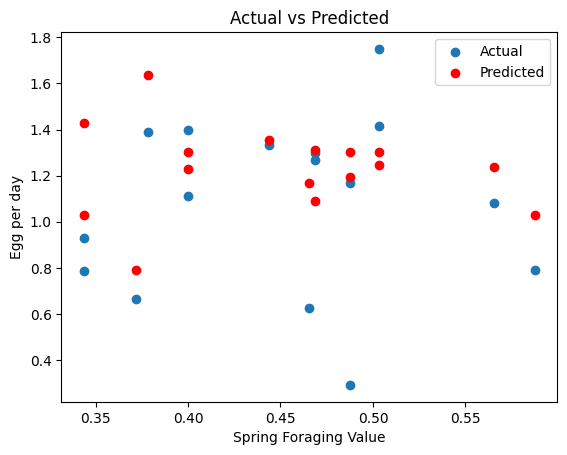

In [42]:
import matplotlib.pyplot as plt

# Generate x values
x = X_eval['value']

# Generate predicted y values
y_pred = rf_model.predict(X_eval)

# Plot the actual data points
plt.scatter(x, y_eval, label='Actual')

# Plot the predicted values as scatter plot
plt.scatter(x, y_pred, color='red', label='Predicted')

# Add labels and title
plt.xlabel('Spring Foraging Value')
plt.ylabel('Egg per day')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [43]:
# Evaluate the model on the evaluation data
score = rf_model.score(X_eval, y_eval)
print("Model Score:", score)


Model Score: 0.10149394935859346


In [44]:
# Evaluate the model on the evaluation data
score = model.score(X_eval, y_eval)
print("Model Score:", score)


Model Score: -0.015571127098474413


In [45]:
# Investigate temperature and lanscape features on larval mortality and on sex ratio

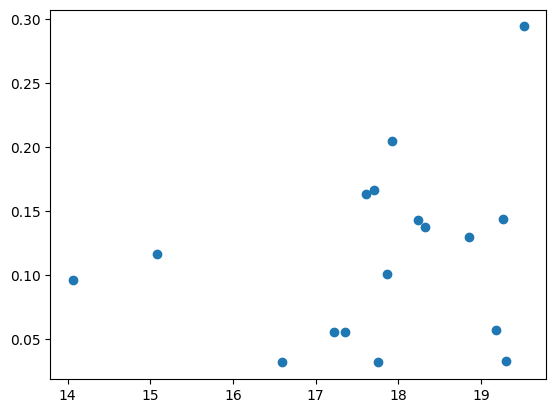

In [46]:
plt.scatter(dt2['Temp_C'], dt2['Proportion_Larval_Mortality'])

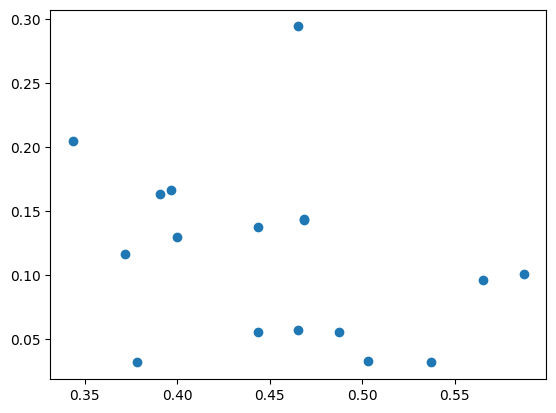

In [47]:
plt.scatter(dt2['value'], dt2['Proportion_Larval_Mortality'])

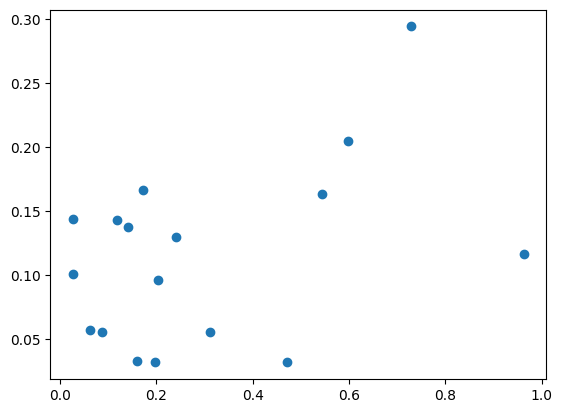

In [48]:
plt.scatter(dt2['Ag_250m'], dt2['Proportion_Larval_Mortality'])

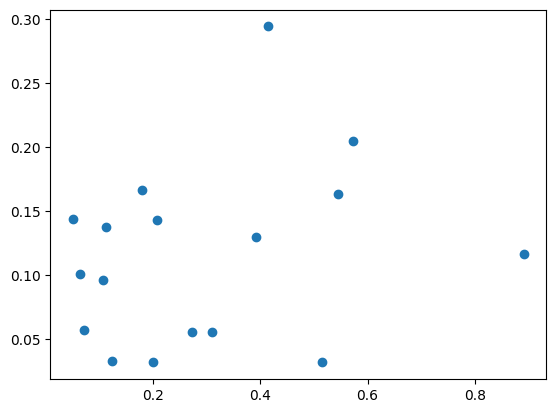

In [49]:
plt.scatter(dt2['Ag_500m'], dt2['Proportion_Larval_Mortality'])

In [50]:
################## add simulation model data ##########

In [51]:
tmean = pd.read_csv("/Users/edwardamoah/Documents/GitHub/osmiaBeePop/research/data/tmean_data.csv")
ppt = pd.read_csv("/Users/edwardamoah/Documents/GitHub/osmiaBeePop/research/data/ppt_data.csv")

In [52]:
tmean

,Unnamed: 0,Site,lat,lon,PRISM_tmean_stable_4kmD2_20150501_bil,PRISM_tmean_stable_4kmD2_20150502_bil,PRISM_tmean_stable_4kmD2_20150503_bil,PRISM_tmean_stable_4kmD2_20150504_bil,PRISM_tmean_stable_4kmD2_20150505_bil,PRISM_tmean_stable_4kmD2_20150506_bil,...,PRISM_tmean_stable_4kmD2_20150621_bil,PRISM_tmean_stable_4kmD2_20150622_bil,PRISM_tmean_stable_4kmD2_20150623_bil,PRISM_tmean_stable_4kmD2_20150624_bil,PRISM_tmean_stable_4kmD2_20150625_bil,PRISM_tmean_stable_4kmD2_20150626_bil,PRISM_tmean_stable_4kmD2_20150627_bil,PRISM_tmean_stable_4kmD2_20150628_bil,PRISM_tmean_stable_4kmD2_20150629_bil,PRISM_tmean_stable_4kmD2_20150630_bil
0,1,AB,42.872910,-77.006513,13.025001,13.265000,15.205001,18.338001,20.376001,15.051001,...,19.854000,21.546001,23.531002,21.350000,20.132002,19.868000,17.980001,14.958001,15.544001,18.211000
1,2,BA,42.606404,-76.498592,11.782001,10.617001,12.689000,16.022001,19.242001,15.639001,...,18.527000,19.742001,22.018002,20.083000,17.526001,18.237001,17.659000,14.750001,15.107000,17.653002
2,3,BD,42.553447,-76.657857,12.435000,11.573001,13.850000,16.779001,19.749001,16.033001,...,18.693001,20.670000,22.717001,20.890001,18.527000,18.754002,17.880001,14.759001,15.489000,18.087002
3,4,EV,42.190078,-76.566951,11.114000,9.782001,11.701000,14.320001,18.093000,16.048000,...,17.011002,20.197001,21.425001,20.011002,17.029001,17.991001,17.617001,14.752001,15.346001,17.876001
4,5,GR,42.655905,-76.472180,11.344001,10.090000,12.041000,15.565001,18.761002,15.249001,...,18.183001,19.383001,21.562000,19.603001,16.883001,17.684000,17.194000,14.410001,14.748001,17.251001
5,6,HG,42.357730,-76.511230,11.761001,10.366000,12.661000,15.769001,19.085001,15.764001,...,18.280001,19.660002,21.987001,19.946001,17.276001,17.840000,17.675001,15.013000,15.298000,17.708000
6,7,HS,42.856325,-77.024492,12.506001,12.802001,14.816001,18.002001,20.171001,15.189001,...,19.539001,21.155001,23.262001,20.936001,19.593000,19.400002,17.599001,14.723001,15.407001,18.039001
7,8,IC,42.470067,-76.549003,12.371000,11.023001,13.359000,16.494001,19.684000,16.236000,...,18.911001,20.090000,22.532001,20.543001,18.008001,18.503000,18.188002,15.225000,15.715001,18.192001
8,9,IT,42.442749,-76.462859,11.849001,10.115001,12.807000,16.137001,19.417002,15.824000,...,18.920000,19.372002,22.245001,20.156000,17.638000,18.170000,18.151001,16.014000,15.961000,18.096001
9,10,KI,42.562256,-76.652713,12.435000,11.573001,13.850000,16.779001,19.749001,16.033001,...,18.693001,20.670000,22.717001,20.890001,18.527000,18.754002,17.880001,14.759001,15.489000,18.087002


In [53]:
# loading forage quality data
import math
import re
import numpy as np
import pandas as pd



################# tmean data #################

cols = tmean.columns.tolist()

new_cols = []
for col in cols:
    if "PRISM_tmean" in col:
        new_cols.append(col.split("_")[-2])
    else:
        new_cols.append(col)
new_cols

tmean = tmean.rename(columns=dict(zip(tmean.columns, new_cols)))


tmean["grid_id"] = tmean['Site'] #tmean["col"].astype(str) + "_" + tmean["row"].astype(str)

def getTmean(site, day, month, year, tmean=tmean):
    '''
    Get temperature data for a given grid cell
    col: int, column number
    row: int, row number
    day: int, day of the month
    month: int, month of the year
    year: int, year
    tmean: pd.DataFrame, temperature data

    output:
    float, temperature in degrees celcius
    '''
    if month < 10:
        month = "0" + str(month)
    if day < 10:
        day = "0" + str(day)
    date = str(year) + "" + str(month) + "" + str(day)
    grid_id = site #str(col) + "_" + str(row)
    tmean = tmean[tmean["grid_id"] == grid_id][date].values[0]
    return tmean

############### ppt data #################

cols = ppt.columns.tolist()

new_cols = []
for col in cols:
    if "PRISM_ppt" in col:
        new_cols.append(col.split("_")[-2])
    else:
        new_cols.append(col)

ppt = ppt.rename(columns=dict(zip(ppt.columns, new_cols)))

ppt["grid_id"] = ppt['Site'] #ppt["col"].astype(str) + "_" + ppt["row"].astype(str)

def getPpt(site, day, month, year, ppt=ppt):
    '''
    Get precipitation data for a given grid cell
    col: int, column number
    row: int, row number
    day: int, day of the month
    month: int, month of the year
    year: int, year
    ppt: pd.DataFrame, precipitation data

    output:
    float, precipitation in mm
    '''
    if month < 10:
        month = "0" + str(month)
    if day < 10:
        day = "0" + str(day)
    date = str(year) + "" + str(month) + "" + str(day)
    grid_id = site #str(col) + "_" + str(row)
    ppt = ppt[ppt["grid_id"] == grid_id][date].values[0]
    return ppt

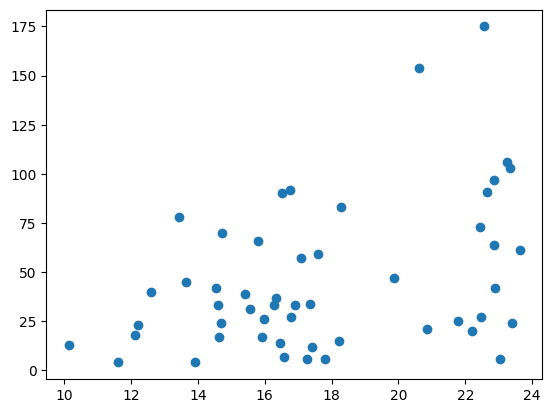

In [54]:
plt.scatter(data2['Temp_C'], data2['Total_Emerged_Adults'])

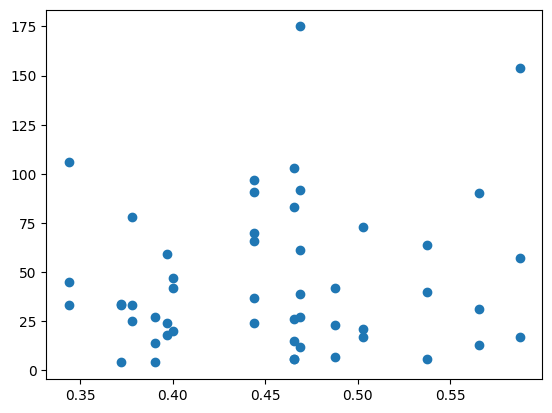

In [55]:
plt.scatter(data2['value'], data2['Total_Emerged_Adults'])

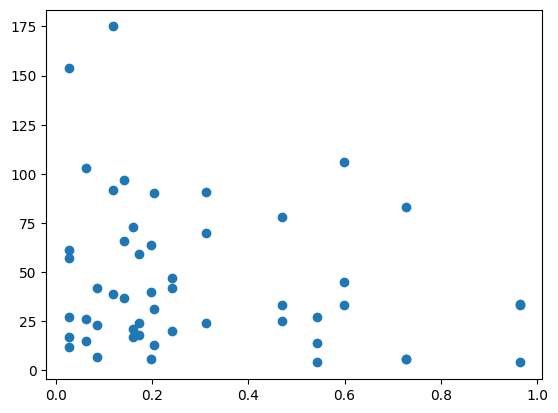

In [56]:
plt.scatter(data2['Ag_250m'], data2['Total_Emerged_Adults'])

In [57]:
data2['Date'] = pd.to_datetime(data2['Calendar_Date'])

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_31072/1303300724.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Date'] = pd.to_datetime(data2['Calendar_Date'])


In [58]:
data2['day'] = data2['Date'].dt.day
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

In [59]:
from datetime import datetime

def getReproduction(site, day, month, year, tmean=tmean, ppt=ppt):
    '''
    Get reproduction data for a given site
    site: str, site code
    day: int, day of the month
    month: int, month of the year
    year: int, year
    tmean: pd.DataFrame, temperature data
    ppt: pd.DataFrame, precipitation data

    output:
    float, egg per day
    '''


    #day = 20
    #month = 5
    #year = 2015
    date = datetime(year, month, day)
    #site = 'AB'


    # get temperate for 6 days prior to the date
    date_new = date - pd.DateOffset(days=6)
    tmean = []
    ppt = []
    for i in range(6):
        temp_date = date_new + pd.DateOffset(days=i)
        day = temp_date.day
        month = temp_date.month
        year = temp_date.year
        tmean.append(getTmean(site, day, month, year))
        ppt.append(getPpt(site, day, month, year))


    tmean_avg = np.mean(tmean)
    ppt_avg = np.mean(ppt)

    forage_days = 0
    for i in range(6):
        td = tmean[i]
        pt = ppt[i]

        if td >= 13.9 and pt < 5.0:
            forage_days += 1

    return {
        "tmean": tmean,
        "ppt": ppt,
        "tmean_avg": tmean_avg,
        "ppt_avg": ppt_avg,
        "forage_days": forage_days
    }





In [60]:
data2['reproduction'] = data2.apply(lambda x: getReproduction(x['Site_Code'], x['day'], x['month'], x['year']), axis=1)

In [61]:
[dt["tmean_avg"] for dt in data2['reproduction'].tolist()]

[16.44366741180419,
 16.853334108988445,
 16.56716759999593,
 12.16300082206726,
 17.060500939687085,
 14.646833896636968,
 16.383001009623218,
 19.194667657216385,
 14.309167067209883,
 11.9960006872813,
 18.0410006841024,
 13.880000909169517,
 11.652000586191813,
 16.54150048891705,
 14.327834129333501,
 15.851500670115165,
 18.469501177469883,
 13.856500784556085,
 16.25033426284792,
 14.424333890279138,
 16.60816764831544,
 14.382167418797813,
 18.92133458455405,
 14.647667566935231,
 17.704500993092864,
 17.33150068918864,
 14.576334158579535,
 16.383001009623218,
 12.18900060653686,
 19.194667657216385,
 17.535500685373933,
 17.72533432642618,
 14.933333873748781,
 16.451167424519834,
 16.85716732343037,
 16.64166720708211,
 15.820334037144972,
 12.355667193730675,
 13.693167209625267,
 18.379001299540203,
 18.6476674079895,
 15.549334208170583,
 14.384334166844676,
 15.267500480016077,
 16.394000848134368,
 16.48550049463907,
 14.650833924611428,
 16.751167297363292,
 16.3063341

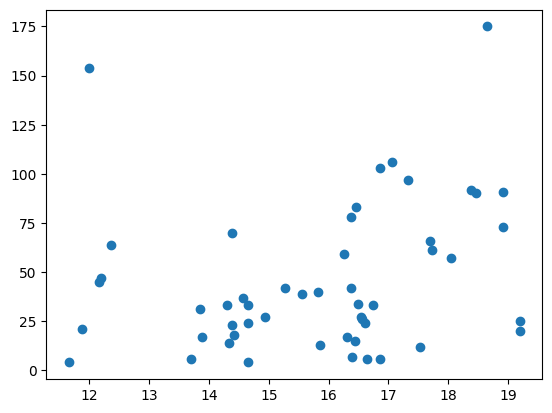

In [62]:
plt.scatter([dt["tmean_avg"] for dt in data2['reproduction'].tolist()], data2['Total_Emerged_Adults'])

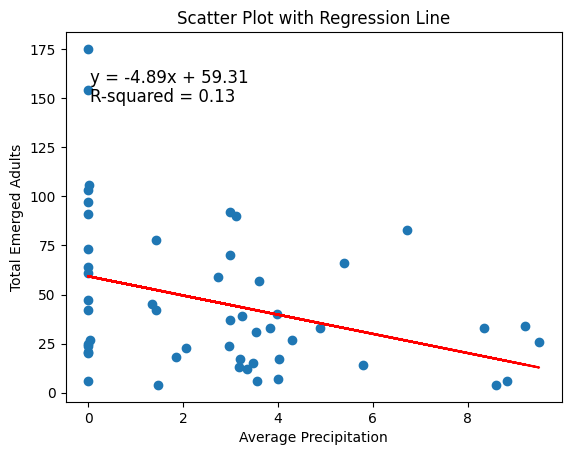

In [63]:
import numpy as np
from scipy import stats
# Get the x and y values for the scatter plot
x = [dt["ppt_avg"] for dt in data2['reproduction'].tolist()]
y = data2['Total_Emerged_Adults']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, regression_line(x), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(x, y).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add labels and title
plt.xlabel('Average Precipitation')
plt.ylabel('Total Emerged Adults')
plt.title('Scatter Plot with Regression Line')

# Display the plot
plt.show()


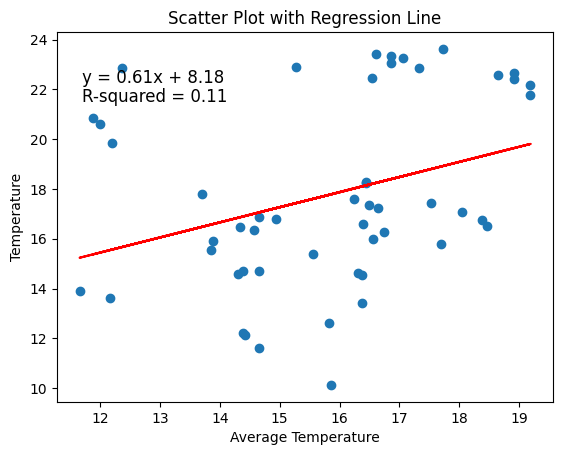

In [64]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# Get the x and y values
x = [dt["tmean_avg"] for dt in data2['reproduction'].tolist()]
y = data2['Temp_C']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, regression_line(x), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(x, y).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add labels and title
plt.xlabel('Average Temperature')
plt.ylabel('Temperature')
plt.title('Scatter Plot with Regression Line')

# Display the plot
plt.show()


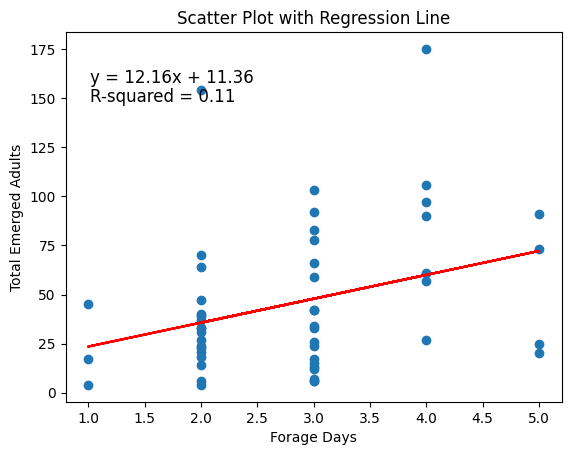

In [65]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Get the x and y values
x = [dt["forage_days"] for dt in data2['reproduction'].tolist()]
y = data2['Total_Emerged_Adults']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, regression_line(x), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(x, y).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add labels and title
plt.xlabel('Forage Days')
plt.ylabel('Total Emerged Adults')
plt.title('Scatter Plot with Regression Line')

# Display the plot
plt.show()


In [66]:
data2["forage_days"] = [dt["forage_days"] for dt in data2['reproduction'].tolist()]
data2["tmean_avg"] = [dt["tmean_avg"] for dt in data2['reproduction'].tolist()]
data2["ppt_avg"] = [dt["ppt_avg"] for dt in data2['reproduction'].tolist()]


In [67]:
data2

,Site,Long,Lat,class,radius,season,year,value,Site_Code,Orchard_Area_m2,...,Floral_Evenness,Total_Emerged_Adults,Total_Nest_Tubes,Date,day,month,reproduction,forage_days,tmean_avg,ppt_avg
0,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.640590,15,6,2015-05-20,20,5,"{'tmean': [9.19300079345703, 12.068000793457, ...",3,16.443667,3.468500
1,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.667812,103,14,2015-05-28,28,5,"{'tmean': [13.2430009841919, 7.86700057983398,...",3,16.853334,0.000000
2,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.580816,26,5,2015-06-03,3,6,"{'tmean': [23.052001953125, 17.2150001525879, ...",3,16.567168,9.503333
3,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.861806,45,9,2015-05-25,25,5,"{'tmean': [22.4860019683838, 14.9300003051758,...",1,12.163001,1.339833
4,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.727919,106,22,2015-05-29,29,5,"{'tmean': [7.03200054168701, 10.2450008392334,...",4,17.060501,0.019500
5,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.660452,33,9,2015-06-04,4,6,"{'tmean': [16.0610008239746, 20.2970008850098,...",2,14.646834,4.875833
6,BD,-76.65786,42.55345,Forage,1km,spring,2015,0.378125,BD,26093.088,...,0.956816,78,12,2015-05-23,23,5,"{'tmean': [19.3040008544922, 20.3960018157959,...",3,16.383001,1.431167
7,BD,-76.65786,42.55345,Forage,1km,spring,2015,0.378125,BD,26093.088,...,0.310198,25,5,2015-05-30,30,5,"{'tmean': [11.2300004959106, 18.3470001220703,...",5,19.194668,0.000000
8,BD,-76.65786,42.55345,Forage,1km,spring,2015,0.378125,BD,26093.088,...,0.478574,33,6,2015-06-05,5,6,"{'tmean': [21.0160007476807, 19.4080009460449,...",2,14.309167,3.832333
9,EV,-76.56695,42.19008,Forage,1km,spring,2015,0.587500,EV,68772.525,...,0.865701,154,20,2015-05-27,27,5,"{'tmean': [7.77300024032593, 9.91000080108643,...",2,11.996001,0.000000


In [68]:
data2[['Site','forage_days','Total_Emerged_Adults']].groupby(['Site','forage_days'], as_index=False).mean()

,Site,forage_days,Total_Emerged_Adults
0,AB,3,48.000000
1,BA,1,45.000000
2,BA,2,33.000000
3,BA,4,106.000000
4,BD,2,33.000000
5,BD,3,78.000000
6,BD,5,25.000000
7,EV,1,17.000000
8,EV,2,154.000000
9,EV,4,57.000000


In [69]:
data2[['Site','Calendar_Date','forage_days','Total_Emerged_Adults']].groupby(['Site','Calendar_Date'], as_index=True).mean()

forage_days  Total_Emerged_Adults
Site Calendar_Date                                   
AB   5/20/15                3.0                  15.0
     5/28/15                3.0                 103.0
     6/3/15                 3.0                  26.0
BA   5/25/15                1.0                  45.0
     5/29/15                4.0                 106.0
     6/4/15                 2.0                  33.0
BD   5/23/15                3.0                  78.0
     5/30/15                5.0                  25.0
     6/5/15                 2.0                  33.0
EV   5/27/15                2.0                 154.0
     6/2/15                 4.0                  57.0
     6/6/15                 1.0                  17.0
GR   5/25/15                1.0                   4.0
     5/29/15                4.0                  27.0
     6/4/15                 2.0                  14.0
HG   5/23/15                3.0                  13.0
     6/2/15                 4.0                  90.0
     6/6/15                 2.0                  31.0
HS   5/20/15                3.0                  59.0
     5/24/15                2.0                  18.0
     5/28/15                3.0                  24.0
IC   5/24/15                2.0                  70.0
     5/30/15                5.0                  91.0
     6/5/15                 2.0                  24.0
IT   5/21/15                3.0                  66.0
     5/29/15                4.0                  97.0
     6/4/15                 2.0                  37.0
KI   5/23/15                3.0                  42.0
     5/26/15                2.0                  47.0
     5/30/15                5.0                  20.0
LA   5/21/15                3.0                  12.0
     5/29/15                4.0                  61.0
     6/4/15                 2.0                  27.0
LF   5/20/15                3.0                  83.0
     5/28/15                3.0                   6.0
     6/3/15                 3.0                   6.0
LT   5/23/15                2.0                  40.0
     5/27/15                2.0                  64.0
     6/6/15                 2.0                   6.0
OK   5/21/15                3.0                  92.0
     5/29/15                4.0                 175.0
     6/4/15                 2.0                  39.0
RE   5/24/15                2.0                  23.0
     5/28/15                3.0                  42.0
     6/3/15                 3.0                   7.0
RF   5/20/15                3.0                  34.0
     5/24/15                2.0                   4.0
     6/3/15                 3.0                  33.0
WH   5/23/15                3.0                  17.0
     5/26/15                2.0                  21.0
     5/30/15                5.0                  73.0

In [70]:
data2[['Site', "tmean_avg","ppt_avg","Total_Emerged_Adults"]]

,Site,tmean_avg,ppt_avg,Total_Emerged_Adults
0,AB,16.443667,3.468500,15
1,AB,16.853334,0.000000,103
2,AB,16.567168,9.503333,26
3,BA,12.163001,1.339833,45
4,BA,17.060501,0.019500,106
5,BA,14.646834,4.875833,33
6,BD,16.383001,1.431167,78
7,BD,19.194668,0.000000,25
8,BD,14.309167,3.832333,33
9,EV,11.996001,0.000000,154


In [71]:
# create a model to predict total emerged adults
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the dependent variable
y = data2['Total_Emerged_Adults']
# Define the independent variables
X = data2[['Temp_C','ppt_avg','value']]

# Split the data into training and evaluation data
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3)

# Create a polynomial features transformer
poly = PolynomialFeatures(degree=1)

# Create the GLM model
model = make_pipeline(poly, TweedieRegressor(power=0, alpha=1, link='log'))

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", model.named_steps['tweedieregressor'].intercept_)
print("Coefficients:", model.named_steps['tweedieregressor'].coef_)


Intercept: 1.0891207830275869
Coefficients: [-1.38049883e-08  7.00528360e-02 -6.98263342e-02  3.61071022e+00]


In [72]:
import statsmodels.api as sm

# Fit the model using statsmodels
X_train = sm.add_constant(X_train)  # Add a constant term to the independent variables
model_sm = sm.OLS(y_train, X_train).fit()

# Get the p-values for the coefficients
p_values = model_sm.pvalues

# Print the p-values
print("P-values:", p_values)


P-values: const      0.181695
Temp_C     0.035597
ppt_avg    0.404316
value      0.128712
dtype: float64


In [73]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Total_Emerged_Adults   R-squared:                       0.286
Model:                              OLS   Adj. R-squared:                  0.217
Method:                   Least Squares   F-statistic:                     4.138
Date:                  Tue, 10 Sep 2024   Prob (F-statistic):             0.0141
Time:                          12:58:59   Log-Likelihood:                -173.10
No. Observations:                    35   AIC:                             354.2
Df Residuals:                        31   BIC:                             360.4
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -86.6960     63.456     -1.366      0.182    -216.116      42.724
Temp_C         4.2081      1.915      2.197      0.036       0.302       8.114
ppt_avg       -2.3330      2.759     -0.845      0.404      -7.961       3.295
value        147.4066     94.440      1.561      0.129     -45.205     340.019
==============================================================================
Omnibus:                        3.225   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.969
Skew:                           0.512   Prob(JB):                        0.374
Kurtosis:                       3.549   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

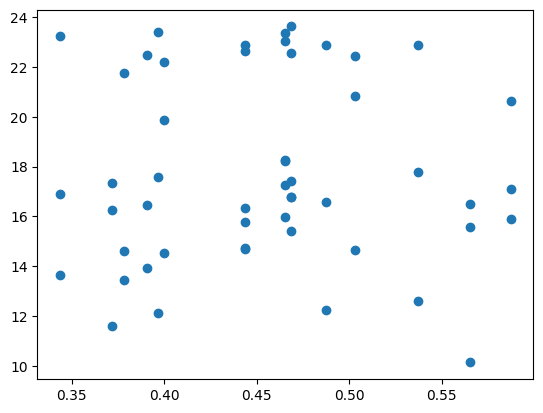

In [74]:
plt.scatter(data2['value'], data2['Temp_C'])

In [75]:
data2['value'].corr(data2['Temp_C'])

-0.007641910388263072

In [76]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

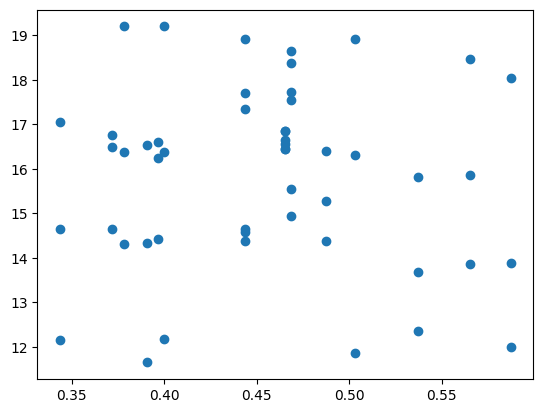

In [77]:
plt.scatter(data2['value'], data2['tmean_avg'])

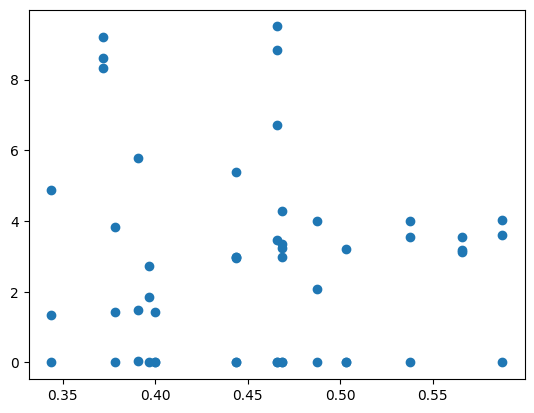

In [78]:
plt.scatter(data2['value'], data2['ppt_avg'])

In [79]:
data2['value'].corr(data2['ppt_avg'])

-0.0590757182273607

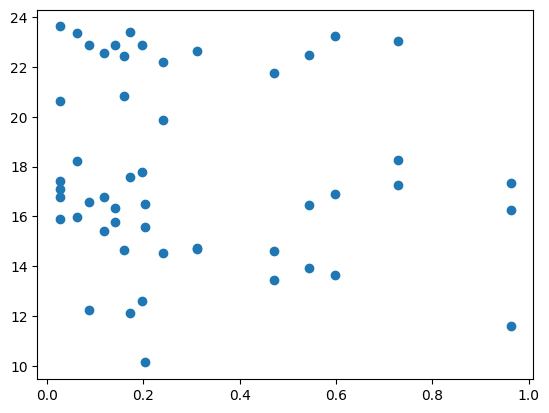

In [80]:
plt.scatter(data2['Ag_250m'], data2['Temp_C'])

In [81]:
data2['Ag_250m'].corr(data2['Temp_C'])

-0.1195699797995009

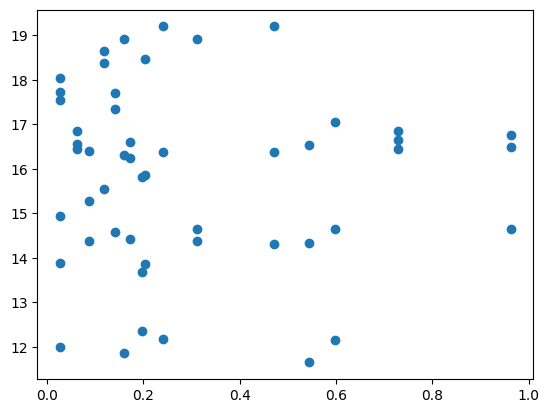

In [82]:
plt.scatter(data2['Ag_250m'], data2['tmean_avg'])

In [83]:
data2['Ag_250m'].corr(data2['tmean_avg'])

-0.0468971074955784

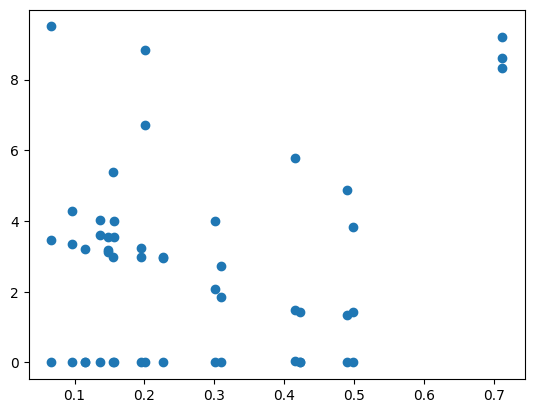

In [84]:
plt.scatter(data2['Ag_1000m'], data2['ppt_avg'])

In [85]:
data2['Ag_1000m'].corr(data2['ppt_avg'])

0.21005638947935526

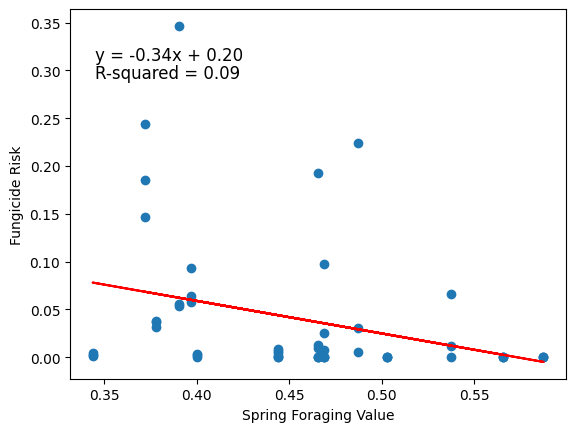

In [86]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Get the x and y values
x = data2['value']
y = data2['Fungicide_Risk_Ave%HQ']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, regression_line(x), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(x, y).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add labels and title
plt.xlabel('Spring Foraging Value')
plt.ylabel('Fungicide Risk')

# Display the plot
plt.show()


In [87]:
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',

('Herb_Risk_Ave%HQ',)

In [88]:
data2['value'].corr(data2['Fungicide_Risk_Ave%HQ'])

-0.30812281271239006

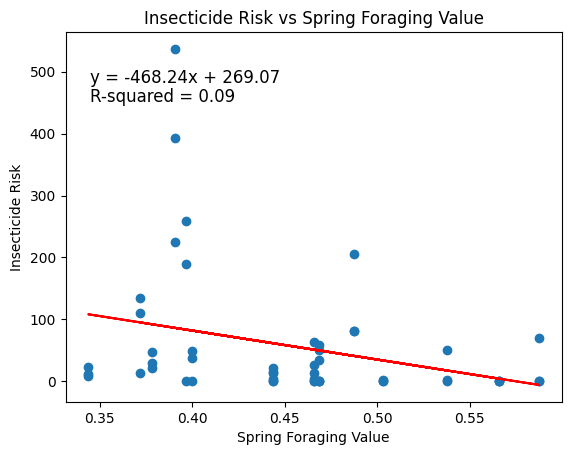

In [89]:
import numpy as np
from scipy import stats
# Get the x and y values for the scatter plot
x = data2['value']
y = data2['Insecticide_Risk_Ave%HQ']

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(x, y)

# Plot the regression line
plt.plot(x, regression_line(x), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(x, y).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add labels and title
plt.xlabel('Spring Foraging Value')
plt.ylabel('Insecticide Risk')
plt.title('Insecticide Risk vs Spring Foraging Value')

# Display the plot
plt.show()


Text(0.5, 1.0, 'Herbicide Risk vs Spring Foraging Value')

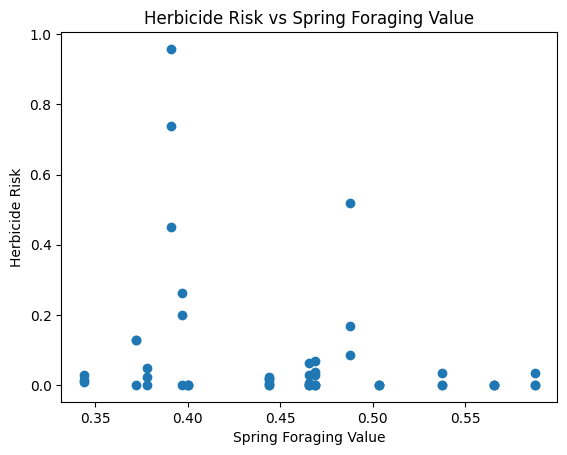

In [90]:
plt.scatter(data2['value'], data2['Herb_Risk_Ave%HQ'])
plt.xlabel('Spring Foraging Value')
plt.ylabel('Herbicide Risk')
plt.title('Herbicide Risk vs Spring Foraging Value')

In [91]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

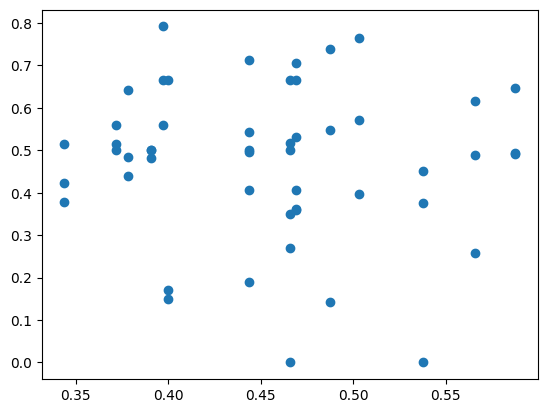

In [92]:
plt.scatter(data2['value'], data2['Proportion_Female_Offspring'])

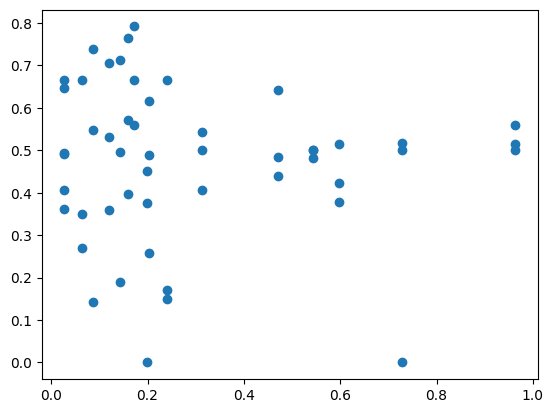

In [93]:
plt.scatter(data2['Ag_250m'], data2['Proportion_Female_Offspring'])

Text(0.5, 1.0, 'Spring Foraging Value vs Ag_500m')

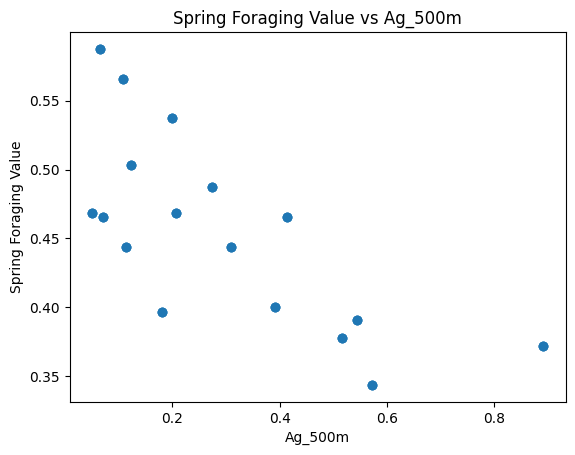

In [94]:
plt.scatter(data2['Ag_500m'], data2['value'])
plt.xlabel('Ag_500m')
plt.ylabel('Spring Foraging Value')
plt.title('Spring Foraging Value vs Ag_500m')

In [95]:
data2['value'].corr(data2['Ag_1000m'])

-0.7609799908252296

Text(0.5, 1.0, 'Spring Foraging Value vs Ag_250m')

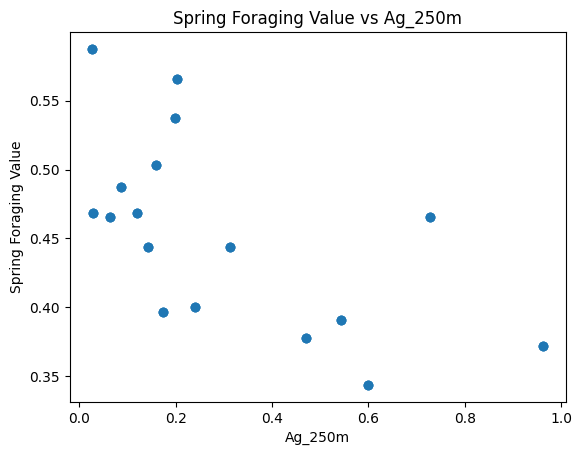

In [96]:
plt.scatter(data2['Ag_250m'], data2['value'])
plt.xlabel('Ag_250m')
plt.ylabel('Spring Foraging Value')
plt.title('Spring Foraging Value vs Ag_250m')

Text(0.5, 1.0, 'Spring Foraging Value vs Ag_1000m (n=17)')

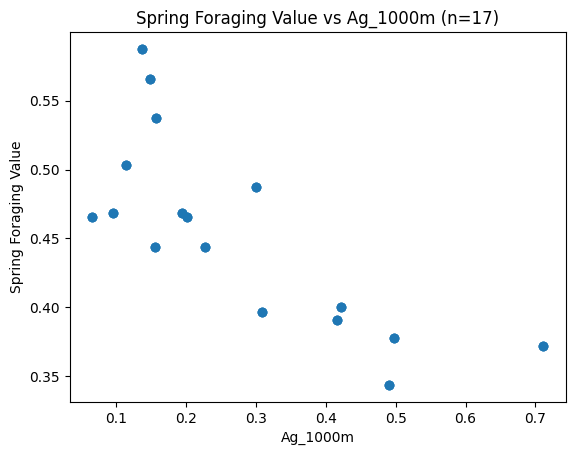

In [97]:
plt.scatter(data2['Ag_1000m'], data2['value'])
plt.xlabel('Ag_1000m')
plt.ylabel('Spring Foraging Value')
plt.title('Spring Foraging Value vs Ag_1000m (n=17)')

Text(0.5, 1.0, 'Total Emerged Adults vs Ag_1000m')

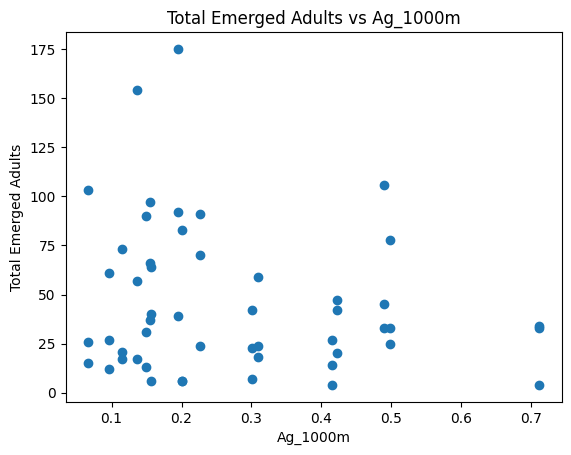

In [98]:
plt.scatter(data2['Ag_1000m'], data2['Total_Emerged_Adults'])
plt.xlabel('Ag_1000m')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Ag_1000m')

In [99]:
data2['Ag_1000m'].corr(data2['Total_Emerged_Adults'])

-0.17926344416011386

Text(0.5, 1.0, 'Total Emerged Adults vs Spring Foraging Value')

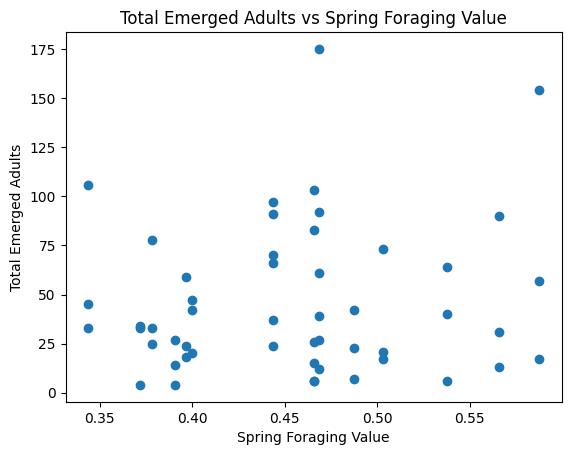

In [100]:
plt.scatter(data2['value'], data2['Total_Emerged_Adults'])
plt.xlabel('Spring Foraging Value')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Spring Foraging Value')

In [101]:
data2['value'].corr(data2['Total_Emerged_Adults'])

0.12724579455843993

In [102]:
dt2.columns.tolist()

['Site_Code',
 'Temp_C',
 'value',
 'Total_Emerged_Adults',
 'Nest_Tubes for_Offspring_Analysis',
 'Proportion_Larval_Mortality',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'egg_per_day']

Text(0.5, 1.0, 'Total Emerged Adults vs Ag_1000m (n=17)')

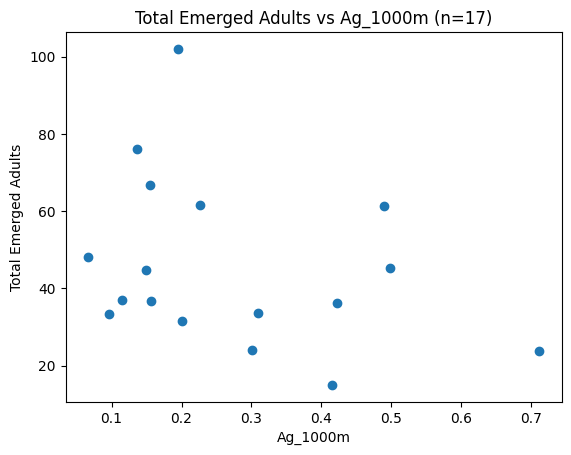

In [103]:
plt.scatter(dt2['Ag_1000m'], dt2['Total_Emerged_Adults'])
plt.xlabel('Ag_1000m')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Ag_1000m (n=17)')

In [104]:
dt2['Ag_1000m'].corr(dt2['Total_Emerged_Adults'])

-0.3142943631055771

Text(0.5, 1.0, 'Total Emerged Adults vs Spring Foraging Value (n=17)')

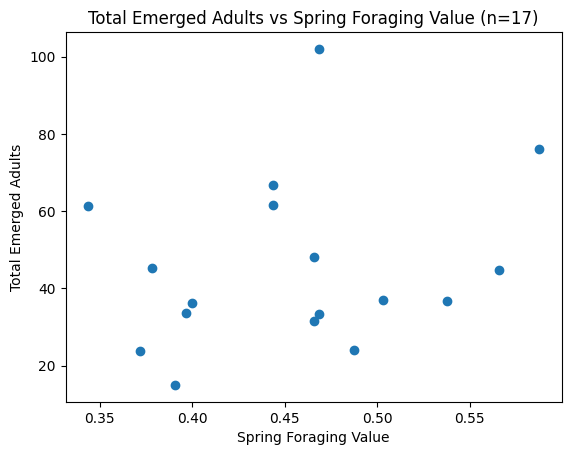

In [105]:
plt.scatter(dt2['value'], dt2['Total_Emerged_Adults'])
plt.xlabel('Spring Foraging Value')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Spring Foraging Value (n=17)')

In [106]:
dt2['value'].corr(dt2['Total_Emerged_Adults'])

0.2230942072210076

In [107]:
dt2.columns.tolist()

['Site_Code',
 'Temp_C',
 'value',
 'Total_Emerged_Adults',
 'Nest_Tubes for_Offspring_Analysis',
 'Proportion_Larval_Mortality',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'egg_per_day']

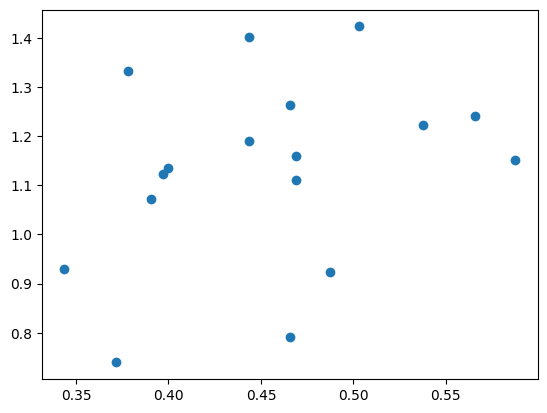

In [108]:
plt.scatter(dt2['value'], dt2['egg_per_day'])

Text(0.5, 1.0, 'Total Emerged Adults vs Temperature (n=51)')

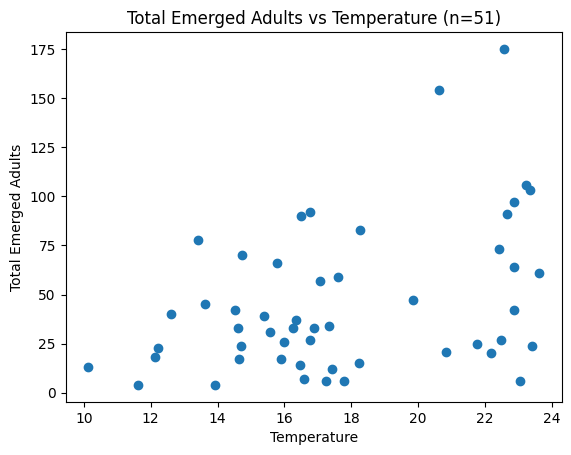

In [109]:
plt.scatter(data2['Temp_C'], data2['Total_Emerged_Adults'])
plt.xlabel('Temperature')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Temperature (n=51)')

In [110]:
data2['Temp_C'].corr(data2['Total_Emerged_Adults'])

0.39958821789274873

Text(0.5, 1.0, 'Total Emerged Adults vs Average Temperature (n=51)')

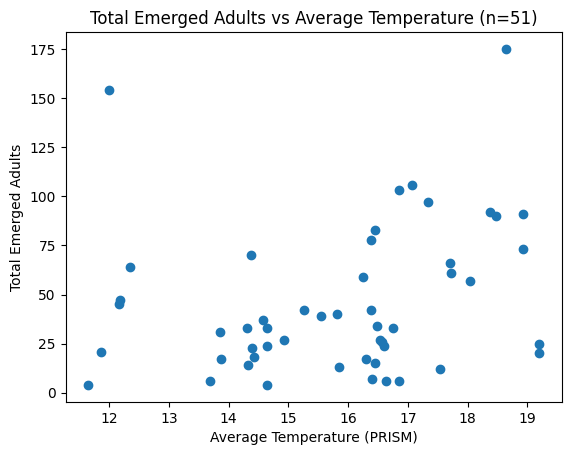

In [111]:
plt.scatter(data2['tmean_avg'], data2['Total_Emerged_Adults'])
plt.xlabel('Average Temperature (PRISM)')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Average Temperature (n=51)')

In [112]:
data2['tmean_avg'].corr(data2['Total_Emerged_Adults'])

0.2488430184614559

Text(0.5, 1.0, 'Total Emerged Adults vs Average Precipitation (n=51)')

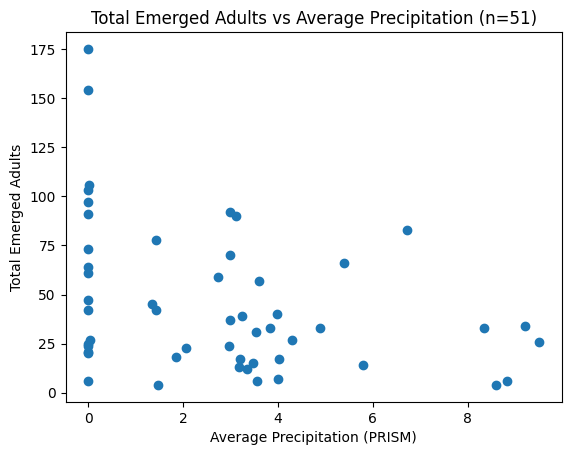

In [113]:
plt.scatter(data2['ppt_avg'], data2['Total_Emerged_Adults'])
plt.xlabel('Average Precipitation (PRISM)')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Average Precipitation (n=51)')

In [114]:
data2['ppt_avg'].corr(data2['Total_Emerged_Adults'])

-0.3557674219844239

In [115]:
dt2

,Site_Code,Temp_C,value,Total_Emerged_Adults,Nest_Tubes for_Offspring_Analysis,Proportion_Larval_Mortality,Ag_250m,Ag_500m,Ag_1000m,Ag_2000m,egg_per_day
0,AB,19.180961,0.465625,48.000000,6.333333,0.056895,0.063348,0.071918,0.066514,0.205731,1.263158
1,BA,17.923662,0.343750,61.333333,11.000000,0.205034,0.598174,0.572248,0.489971,0.554394,0.929293
2,BD,16.598320,0.378125,45.333333,5.666667,0.032323,0.470320,0.515535,0.497709,0.341119,1.333333
3,EV,17.869944,0.587500,76.000000,11.000000,0.100560,0.027149,0.065367,0.136755,0.089763,1.151515
4,GR,17.613889,0.390625,15.000000,2.333333,0.163158,0.543379,0.545040,0.415856,0.509642,1.071429
5,HG,14.064100,0.565625,44.666667,6.000000,0.095793,0.203620,0.107798,0.148498,0.167013,1.240741
6,HS,17.706927,0.396875,33.666667,5.000000,0.166311,0.172727,0.180571,0.309367,0.399413,1.122222
7,IC,17.356604,0.443750,61.666667,7.333333,0.055485,0.312217,0.309989,0.227090,0.228565,1.401515
8,IT,18.329505,0.443750,66.666667,9.333333,0.137844,0.142202,0.113402,0.155256,0.107783,1.190476
9,KI,18.859304,0.400000,36.333333,5.333333,0.129935,0.240741,0.391504,0.422515,0.297592,1.135417


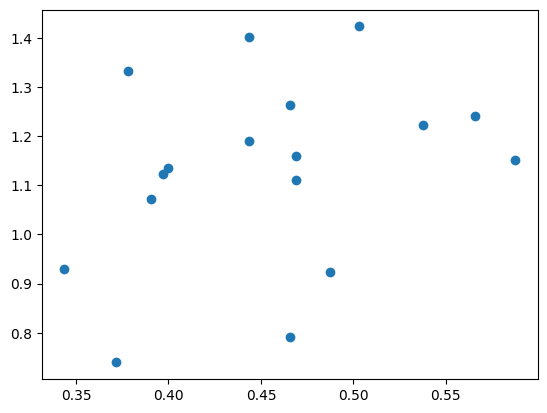

In [116]:
plt.scatter(dt2['value'], dt2['egg_per_day'])

In [117]:
from sklearn.linear_model import LinearRegression

# Define the dependent variable
y = dt2['egg_per_day']

# Define the independent variable(s)
X = dt2[['value']]

# Create the linear regression model
model = LinearRegression()

# Fit the model on the data
model.fit(X, y)
#dt2['value'], dt2['egg_per_day']

LinearRegression()

In [118]:
model.predict([[0]])

/Users/edwardamoah/Documents/GitHub/osmiaBeePop/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.73027121])

In [119]:
model.predict([[1]])

/Users/edwardamoah/Documents/GitHub/osmiaBeePop/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.61050653])

In [120]:
#data2['Calendar_Date']

data2['Date'] = pd.to_datetime(data2['Calendar_Date'])

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_31072/2535730328.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Date'] = pd.to_datetime(data2['Calendar_Date'])


In [121]:
earliest_date = data2['Date'].min()
latest_date = data2['Date'].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)


Earliest Date: 2015-05-20 00:00:00
Latest Date: 2015-06-06 00:00:00


In [122]:
def getPeriod(date):
    earliest_date = pd.to_datetime('2015-05-07')
    return (date - earliest_date).days

In [123]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

In [124]:
dt3 = data2[['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date']].query(' Time_Point == 3 ')

In [125]:
dt3['period'] = dt3['Date'].apply(getPeriod)

(array([1., 0., 2., 0., 0., 0., 4., 5., 2., 3.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <BarContainer object of 10 artists>)

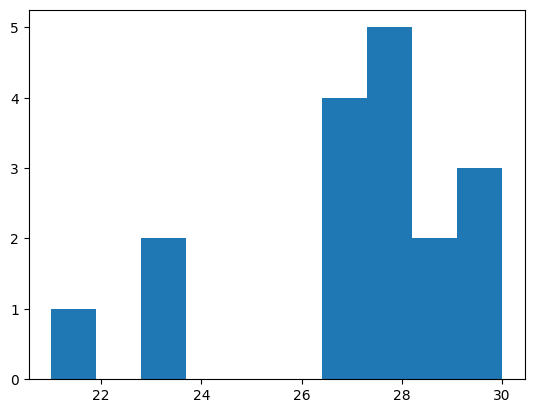

In [126]:
plt.hist(dt3['period'], bins=10)

In [127]:
data2['Proportion_Larval_Mortality']

0     0.105263
1     0.065421
2     0.000000
3     0.238095
4     0.193333
5     0.183673
6     0.066667
7     0.000000
8     0.030303
9     0.079268
10    0.064516
11    0.157895
12    0.200000
13    0.184211
14    0.105263
15    0.200000
16    0.087379
17    0.000000
18    0.015152
19    0.086957
20    0.396825
21    0.097826
22    0.068627
23    0.000000
24    0.147368
25    0.087591
26    0.178571
27    0.000000
28    0.172414
29    0.217391
30    0.312500
31    0.080645
32    0.038462
33    0.142857
34    0.740741
35    0.000000
36    0.037736
37    0.057143
38    0.000000
39    0.250000
40    0.040698
41    0.138889
42    0.000000
43    0.166667
44    0.000000
45    0.035714
46    0.000000
47    0.314815
48    0.050000
49    0.000000
50    0.049383
Name: Proportion_Larval_Mortality, dtype: float64

In [128]:
date = pd.to_datetime('2015-05-07')
dates_list = []
for i in range(9):
    dates_list.append(date + pd.DateOffset(days=i*6))

In [129]:
dates_list

[Timestamp('2015-05-07 00:00:00'),
 Timestamp('2015-05-13 00:00:00'),
 Timestamp('2015-05-19 00:00:00'),
 Timestamp('2015-05-25 00:00:00'),
 Timestamp('2015-05-31 00:00:00'),
 Timestamp('2015-06-06 00:00:00'),
 Timestamp('2015-06-12 00:00:00'),
 Timestamp('2015-06-18 00:00:00'),
 Timestamp('2015-06-24 00:00:00')]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '5/20/15'),
  Text(1, 0, '5/28/15'),
  Text(2, 0, '6/3/15'),
  Text(3, 0, '5/25/15'),
  Text(4, 0, '5/29/15'),
  Text(5, 0, '6/4/15'),
  Text(6, 0, '5/23/15'),
  Text(7, 0, '5/30/15'),
  Text(8, 0, '6/5/15'),
  Text(9, 0, '5/27/15'),
  Text(10, 0, '6/2/15'),
  Text(11, 0, '6/6/15'),
  Text(12, 0, '5/24/15'),
  Text(13, 0, '5/21/15'),
  Text(14, 0, '5/26/15')])

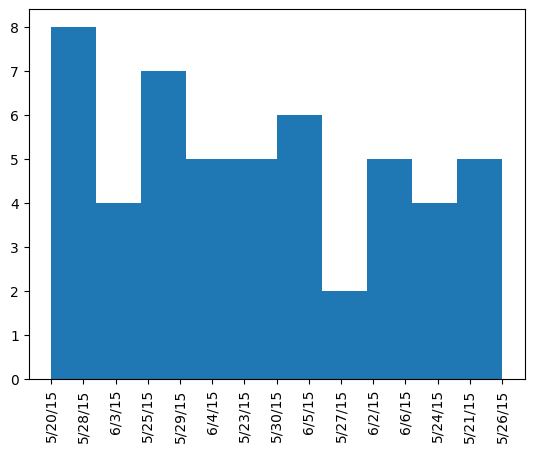

In [130]:
plt.hist(data2['Calendar_Date'])
plt.xticks(rotation=90)

In [131]:
data2

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

Text(0.5, 1.0, 'Spring Foraging Quality vs Ag_1000m (n=17)')

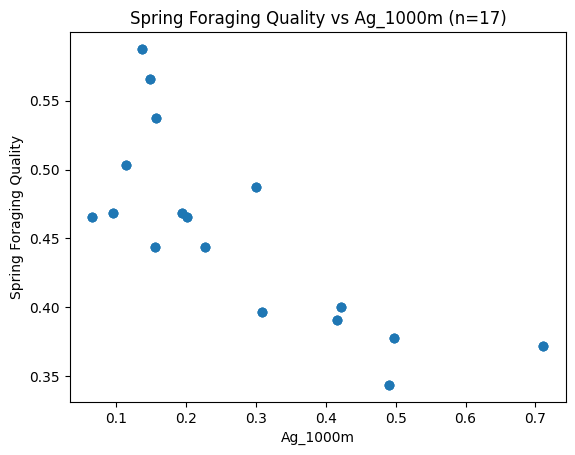

In [138]:
plt.scatter(data2['Ag_1000m'], data2['value'])
plt.xlabel('Ag_1000m')
plt.ylabel('Spring Foraging Quality')
plt.title('Spring Foraging Quality vs Ag_1000m (n=17)')


Text(0.5, 1.0, 'Total Emerged Adults vs Spring Foraging Quality (n=17)')

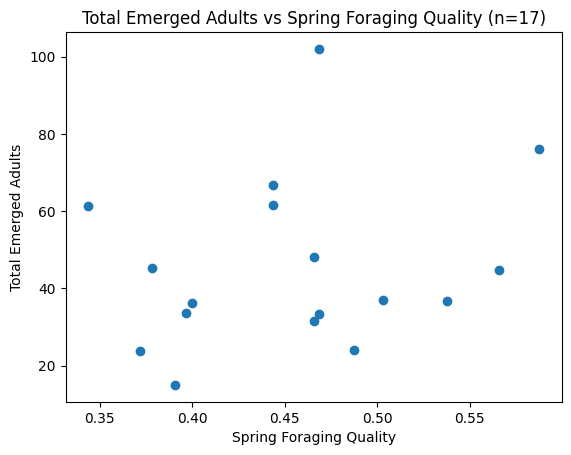

In [142]:
plt.scatter(dt2['value'], dt2['Total_Emerged_Adults'])
plt.xlabel('Spring Foraging Quality')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Spring Foraging Quality (n=17)')

In [153]:
dt4 = data2[["Site_Code", "Temp_C","value","Total_Emerged_Adults", 'Total_Emerged_Females', "Total_Emerged_Males","Nest_Tubes for_Offspring_Analysis", 'Proportion_Larval_Mortality', "Ag_250m", "Ag_500m", "Ag_1000m", "Ag_2000m"]].groupby(['Site_Code'], as_index=False).mean()

# generic value
dt4["egg_per_day"]=(dt4["Total_Emerged_Adults"]/dt4["Nest_Tubes for_Offspring_Analysis"])/6

In [154]:
df = dt4

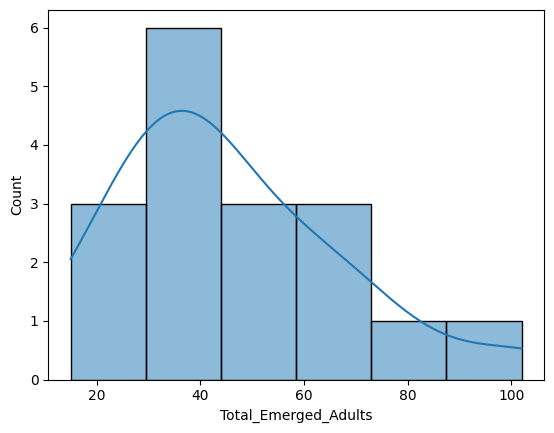

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your data is in a DataFrame 'df'
# Visualize distributions of the variables
sns.histplot(df['Total_Emerged_Adults'], kde=True)
plt.show()


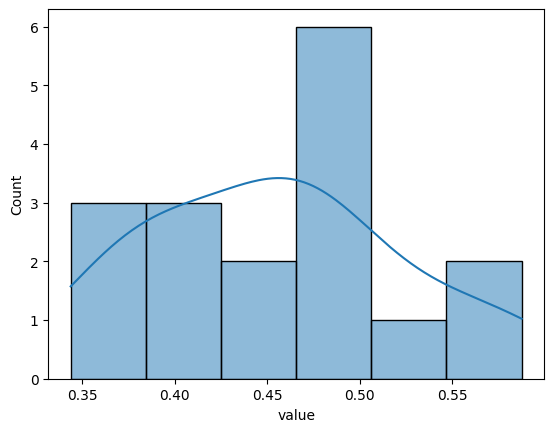

In [156]:
sns.histplot(df['value'], kde=True)
plt.show()

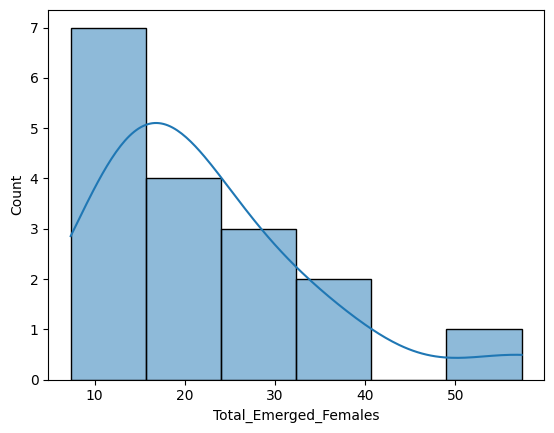

In [157]:
sns.histplot(df['Total_Emerged_Females'], kde=True)
plt.show()

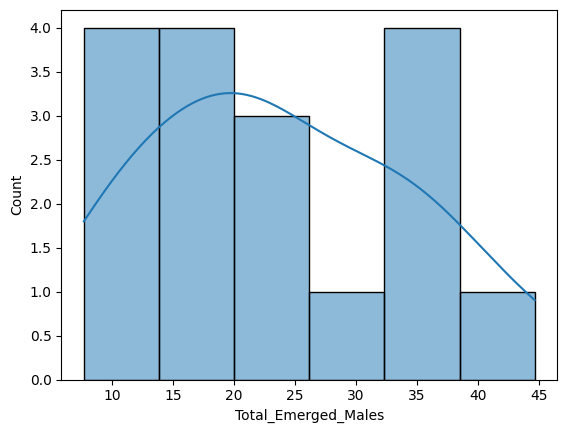

In [158]:
sns.histplot(df['Total_Emerged_Males'], kde=True)
plt.show()

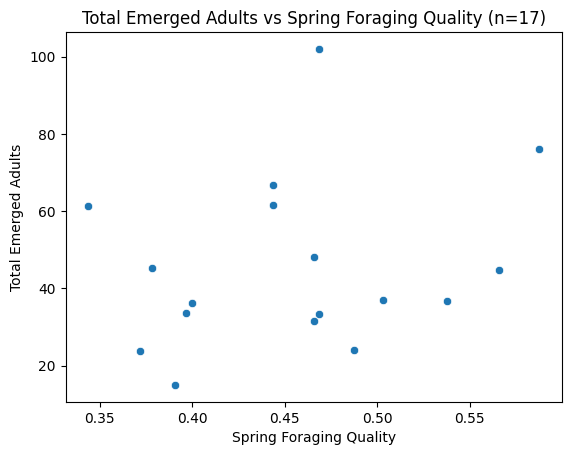

In [173]:
# Scatter plot to check relationships between two variables
sns.scatterplot(x=df['value'], y=df['Total_Emerged_Adults'])
plt.xlabel('Spring Foraging Quality')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Spring Foraging Quality (n=17)')
plt.show()

In [174]:
df['Ag_250m'].corr(df['Total_Emerged_Adults'])

-0.35155890770970427

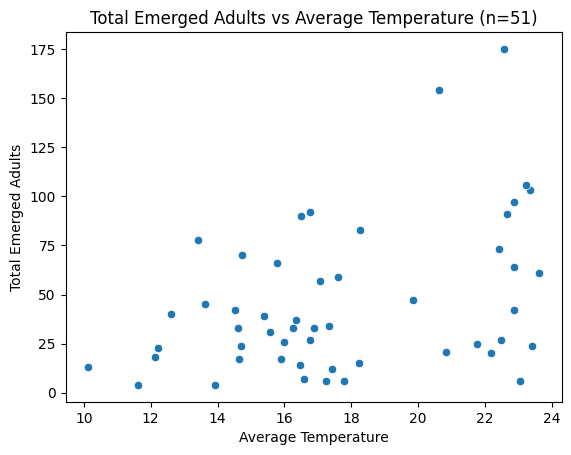

In [183]:
# Scatter plot to check relationships between two variables
sns.scatterplot(x=data2['Temp_C'], y=data2['Total_Emerged_Adults'])
plt.xlabel('Average Temperature')
plt.ylabel('Total Emerged Adults')
plt.title('Total Emerged Adults vs Average Temperature (n=51)')
plt.show()

In [184]:
data2['Temp_C'].corr(data2['Total_Emerged_Adults'])

0.39958821789274873

Text(0.5, 1.0, 'Proportion of Female Offspring vs Spring Foraging Quality (n=51)')

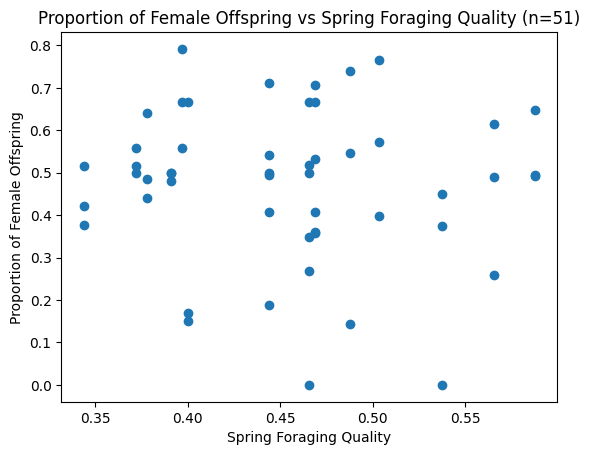

In [188]:
plt.scatter(data2['value'], data2['Proportion_Female_Offspring'])
plt.xlabel('Spring Foraging Quality')
plt.ylabel('Proportion of Female Offspring')
plt.title('Proportion of Female Offspring vs Spring Foraging Quality (n=51)')

In [189]:
data2['value'].corr(data2['Proportion_Female_Offspring'])

-0.06887196057151677

Text(0.5, 1.0, 'Proportion of Female Offspring vs Average Temperature (n=51)')

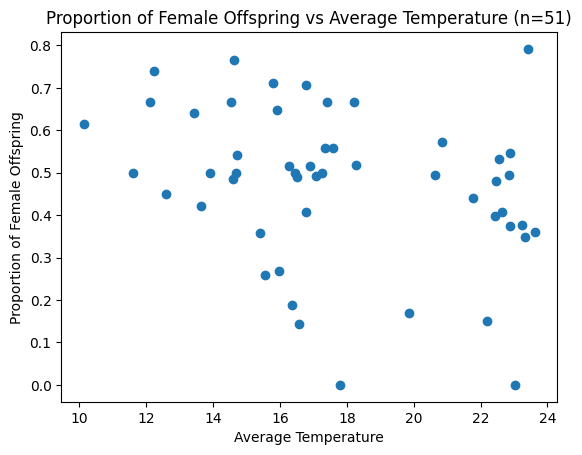

In [194]:
plt.scatter(data2['Temp_C'], data2['Proportion_Female_Offspring'])
plt.xlabel('Average Temperature')
plt.ylabel('Proportion of Female Offspring')
plt.title('Proportion of Female Offspring vs Average Temperature (n=51)')

In [191]:
data2['Temp_C'].corr(data2['Proportion_Female_Offspring'])

-0.3011302066798787

Text(0.5, 1.0, 'Proportion of Female Offspring vs Cumulative Precipitation (n=51)')

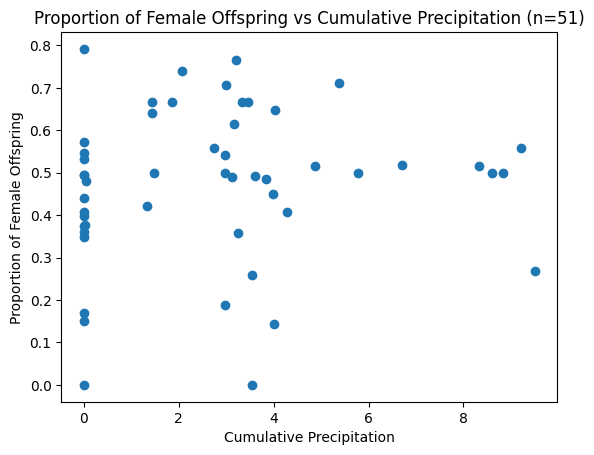

In [195]:
plt.scatter(data2['ppt_avg'], data2['Proportion_Female_Offspring'])
plt.xlabel('Cumulative Precipitation')
plt.ylabel('Proportion of Female Offspring')
plt.title('Proportion of Female Offspring vs Cumulative Precipitation (n=51)')

In [196]:
data2['ppt_avg'].corr(data2['Proportion_Female_Offspring'])

0.10118431740476606

In [197]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

Text(0.5, 1.0, 'Average Female Weight vs Average Precipitation (n=51)')

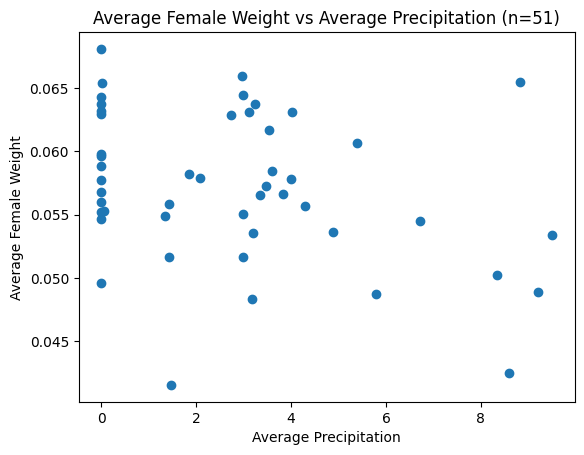

In [202]:
plt.scatter(data2['ppt_avg'], data2['Ave_F_Weight_g'])
plt.xlabel('Average Precipitation')
plt.ylabel('Average Female Weight')
plt.title('Average Female Weight vs Average Precipitation (n=51)')

In [200]:
data2['ppt_avg'].corr(data2['Ave_F_Weight_g'])

-0.31485550934260226

Text(0.5, 1.0, 'Average Female Weight vs Average Temperature (n=51)')

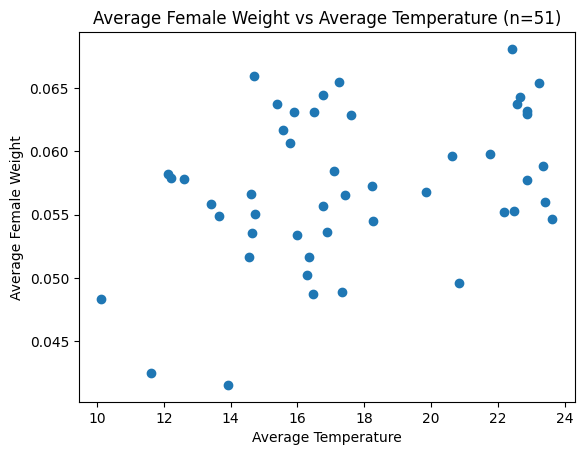

In [203]:
plt.scatter(data2['Temp_C'], data2['Ave_F_Weight_g'])
plt.xlabel('Average Temperature')
plt.ylabel('Average Female Weight')
plt.title('Average Female Weight vs Average Temperature (n=51)')

In [204]:
data2['Temp_C'].corr(data2['Ave_F_Weight_g'])

0.3763931823374295

Text(0.5, 1.0, 'Average Female Weight vs Ag_1000m (n=51)')

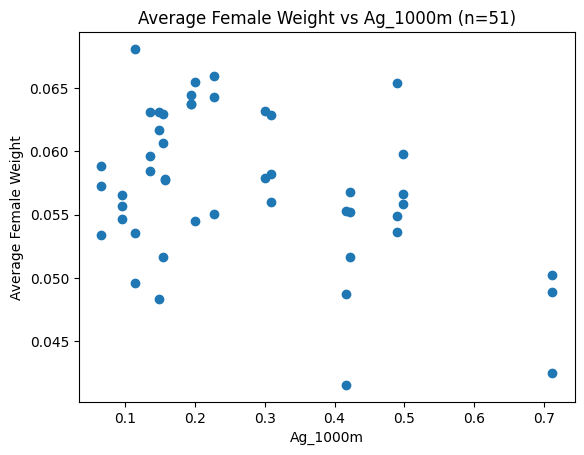

In [209]:
plt.scatter(data2['Ag_1000m'], data2['Ave_F_Weight_g'])
plt.xlabel('Ag_1000m')
plt.ylabel('Average Female Weight')
plt.title('Average Female Weight vs Ag_1000m (n=51)')

In [208]:
data2['Ag_1000m'].corr(data2['Ave_F_Weight_g'])

-0.40575185914826906

In [210]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

Text(0.5, 1.0, 'Larva Mortality vs Ag_1000m (n=51)')

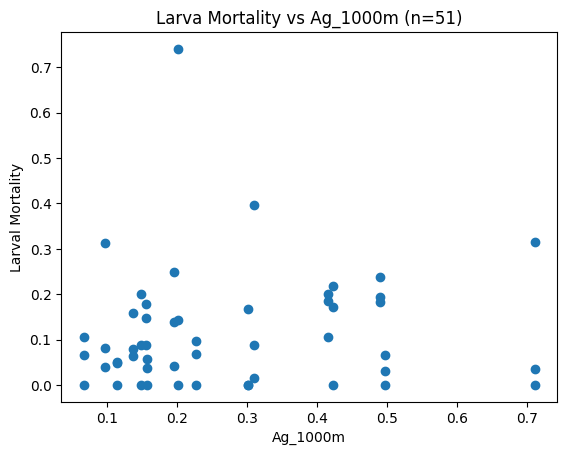

In [212]:
plt.scatter(data2['Ag_1000m'], data2['Proportion_Larval_Mortality'])
plt.xlabel('Ag_1000m')
plt.ylabel('Larval Mortality')
plt.title('Larva Mortality vs Ag_1000m (n=51)')

In [217]:
data2['ppt_avg'].corr(data2['Proportion_Larval_Mortality'])

-0.19323588232174366

In [218]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

Text(0.5, 1.0, 'Larva Mortality vs Ag_1000m (n=51)')

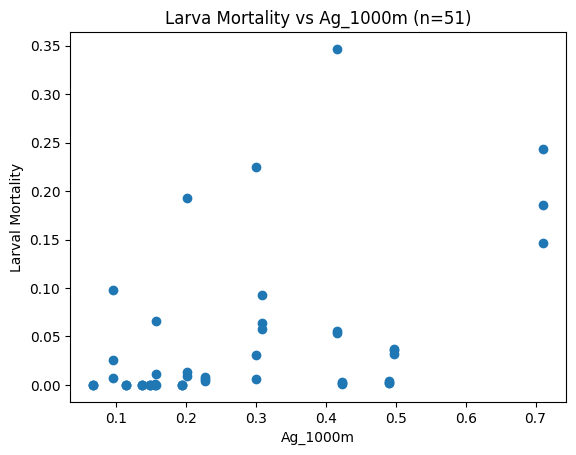

In [220]:
#'Fungicide_Risk_Ave%HQ'

plt.scatter(data2['Ag_1000m'], data2['Fungicide_Risk_Ave%HQ'])
plt.xlabel('Ag_1000m')
plt.ylabel('Larval Mortality')
plt.title('Larva Mortality vs Ag_1000m (n=51)')

In [229]:
print(data2['value'].corr(data2['Floral_Fam_Richness']))
print(data2['value'].corr(data2[ 'Floral_Shannon_Diversity']))
print(data2['value'].corr(data2[  'Floral_Evenness']))

0.1812962446072564
0.17037187758088712
0.016317640318637562


In [230]:
print(data2['Ag_1000m'].corr(data2['Floral_Fam_Richness']))
print(data2['Ag_1000m'].corr(data2[ 'Floral_Shannon_Diversity']))
print(data2['Ag_1000m'].corr(data2[  'Floral_Evenness']))

-0.40006449375578845
-0.4036531471078149
-0.1560387264662865


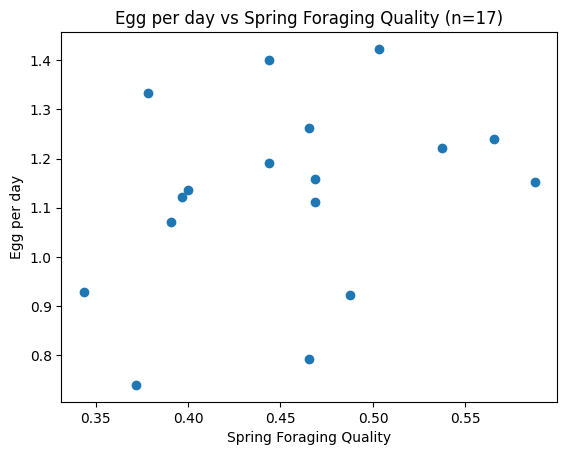

In [235]:
plt.scatter(dt2['value'], dt2['egg_per_day'])
plt.xlabel('Spring Foraging Quality')
plt.ylabel('Egg per day')
plt.title('Egg per day vs Spring Foraging Quality (n=17)')
plt.show()

In [234]:
dt2['value'].corr(dt2['egg_per_day'])

0.31487290402891593

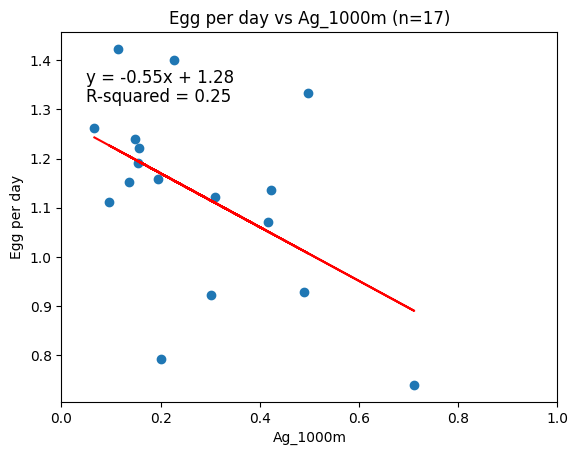

In [251]:
import numpy as np
from scipy import stats
plt.scatter(dt2['Ag_1000m'], dt2['egg_per_day'])
plt.xlabel('Ag_1000m')
plt.ylabel('Egg per day')
plt.title('Egg per day vs Ag_1000m (n=17)')
plt.xlim(0, 1)

# Fit a linear regression line
coefficients = np.polyfit(dt2['Ag_1000m'], dt2['egg_per_day'], 1)
regression_line = np.poly1d(coefficients)

# Plot the regression line
plt.plot(dt2['Ag_1000m'], regression_line(dt2['Ag_1000m']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt2['Ag_1000m'], dt2['egg_per_day']).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


In [237]:
dt2['Ag_1000m'].corr(dt2['egg_per_day'])

-0.504299440836401

In [243]:
-0.55 *(1) + 1.28

0.73

In [247]:
-0.55 *(0) + 1.28

1.28

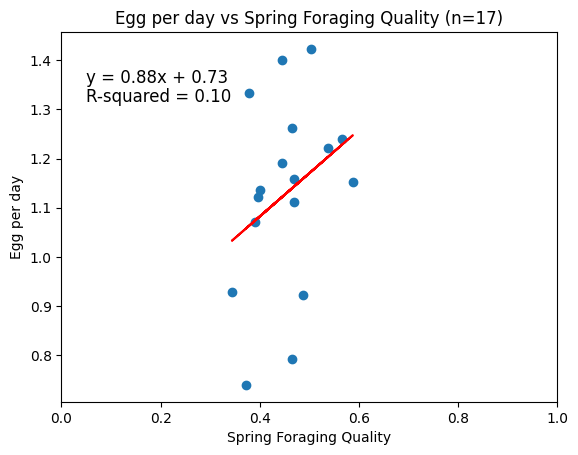

In [250]:
import numpy as np
from scipy import stats
plt.scatter(dt2['value'], dt2['egg_per_day'])
plt.xlabel('Spring Foraging Quality')
plt.ylabel('Egg per day')
plt.title('Egg per day vs Spring Foraging Quality (n=17)')
plt.xlim(0, 1)

# Fit a linear regression line
coefficients = np.polyfit(dt2['value'], dt2['egg_per_day'], 1)
regression_line = np.poly1d(coefficients)

# Plot the regression line
plt.plot(dt2['value'], regression_line(dt2['value']), color='red')

# Add the line equation and R-squared value to the plot
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
r_squared = stats.linregress(dt2['value'], dt2['egg_per_day']).rvalue ** 2
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

In [248]:
0.88 *(1) + 0.73

1.6099999999999999

In [249]:
0.88 *(0) + 0.73

0.73

In [252]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

In [256]:
data2['Temp_C'].corr(data2['Ave_F_Weight_g'])

0.3763931823374295

In [259]:
data2['Temp_C'].corr(data2['Proportion_Larval_Mortality'])

0.23160647747897165

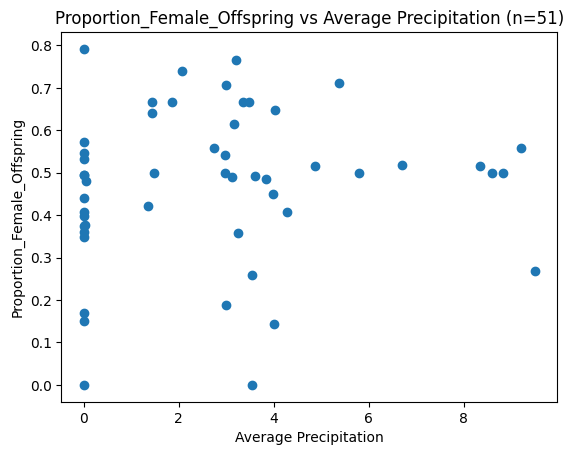

In [261]:
plt.scatter(data2['ppt_avg'], data2['Proportion_Female_Offspring'])
plt.xlabel('Average Precipitation')
plt.ylabel('Proportion_Female_Offspring')
plt.title('Proportion_Female_Offspring vs Average Precipitation (n=51)')
plt.show()

In [263]:
data2.columns.tolist()

['Site',
 'Long',
 'Lat',
 'class',
 'radius',
 'season',
 'year',
 'value',
 'Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes',
 'Date',
 'day',
 'month',
 'reproduction',
 'forage_days',
 'tmean_avg',
 'ppt_avg']

In [264]:
data2.head()

,Site,Long,Lat,class,radius,season,year,value,Site_Code,Orchard_Area_m2,...,Floral_Evenness,Total_Emerged_Adults,Total_Nest_Tubes,Date,day,month,reproduction,forage_days,tmean_avg,ppt_avg
0,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.640590,15,6,2015-05-20,20,5,"{'tmean': [9.19300079345703, 12.068000793457, ...",3,16.443667,3.468500
1,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.667812,103,14,2015-05-28,28,5,"{'tmean': [13.2430009841919, 7.86700057983398,...",3,16.853334,0.000000
2,AB,-77.00651,42.87291,Forage,1km,spring,2015,0.465625,AB,8108.310,...,0.580816,26,5,2015-06-03,3,6,"{'tmean': [23.052001953125, 17.2150001525879, ...",3,16.567168,9.503333
3,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.861806,45,9,2015-05-25,25,5,"{'tmean': [22.4860019683838, 14.9300003051758,...",1,12.163001,1.339833
4,BA,-76.49859,42.60640,Forage,1km,spring,2015,0.343750,BA,14269.631,...,0.727919,106,22,2015-05-29,29,5,"{'tmean': [7.03200054168701, 10.2450008392334,...",4,17.060501,0.019500


['Site_Code',
 'Orchard_Area_m2',
 'Time_Point',
 'Calendar_Date',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Proportion_Female_Offspring',
 'Ave_F_Weight_g',
 'Ave_M_Weight_g',
 'Proportion_Larval_Mortality',
 'Temp_C',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Ag_250m',
 'Ag_500m',
 'Ag_1000m',
 'Ag_2000m',
 'Fungicide_Risk_Ave%HQ',
 'Insecticide_Risk_Ave%HQ',
 'Herb_Risk_Ave%HQ',
 'Floral_Fam_Richness',
 'Floral_Shannon_Diversity',
 'Floral_Evenness',
 'Total_Emerged_Adults',
 'Total_Nest_Tubes']